<a href="https://colab.research.google.com/github/Manolo1109/Trabajo-de-Grado-Aplicado-1/blob/main/ECI_Ventas_EDA_pedidos_Reales_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Grado Presentado por:** Manuel Fabian Sarmiento Marquez

## **1. Contexto del Análisis**

Equipos y Controles Industriales ECI es un proveedor integral de tecnología industrial con un portafolio amplio de productos tales como válvulas, instrumentos de medición, analizadores de proceso, equipos para calibración y avanzados sistemas de control, también ofrecemos servicios “clase mundo” en ingeniería, instalación, configuración y puesta en marcha, así como servicios de mantenimiento para preservar el valor de la inversión durante el ciclo de vida de la planta.  

ECI tiene total cobertura nacional con oficinas en Barrancabermeja, Barranquilla, Bogotá, Cali, Cartagena y Medellín y centros de servicio en Barrancabermeja y Bogotá.  A nivel regional cuenta con oficinas en Ecuador en las ciudades de Quito y Esmeraldas, y desde 1978 cuenta con oficina logística en Miami.

## **2. Caracteristicas de la base de datos:**



Diccionario de datos

Tipoventas	:	Tipoventas

Numerodocumento	:	Numerodocumento

NumeroOriginal	:	NumeroOriginal

Fechadocumento	:	Fechadocumento

Numeroarticulo	:	Numeroarticulo

Descripcionarticulo	:	Descripcionarticulo

DescripcionGenerica	:	DescripcionGenerica

CodigoMarca	:	CodigoMarca

Marca	:	Marca

CodigoLinea	:	CodigoLinea

Linea	:	Linea

Numerocliente	:	Numerocliente

Nombrecliente	:	Nombrecliente

OCCLIENTE	:	OCCLIENTE

ClaseCliente	:	ClaseCliente

Secteconomico	:	Secteconomico

Dpto	:	Dpto

Departamento	:	Departamento

Estadoanulado	:	Estadoanulado

Estadodocumentoventas	:	Estadodocumentoventas

IdVendedor	:	IdVendedor

Vendedor	:	Vendedor

Mes	:	Mes

Cantidad	:	Cantidad

Preciounitario	:	Preciounitario

Precioextendido	:	Precioextendido

CostoUnitario	:	CostoUnitario

CostoExtendido	:	CostoExtendido

Empresa	:	Empresa

fechaVencimiento	:	fechaVencimiento

usuarioGp	:	usuarioGp

Ciudad	:	Ciudad

EstadoDepartamento	:	EstadoDepartamento

Pais	:	Pais

PRSTADCD	:	PRSTADCD

FechaRequerida	:	FechaRequerida

MonedaOriginal	:	MonedaOriginal

valorUnitarioMonedaOriginal	:	valorUnitarioMonedaOriginal

Moneda	:	Moneda

DireccionFacturacion	:	DireccionFacturacion

MetodoEntrega	:	MetodoEntrega

CondicionesPago	:	CondicionesPago

CREATDDT	:	CREATDDT


## **3. Carga de librerias y del dataset:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from locale import normalize


from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab as py
from datetime import datetime

#!pip install install bayesian-optimization
from bayes_opt import BayesianOptimization
import warnings

In [ ]:
df=pd.read_csv('eci_Pedidos_Reales.csv', delimiter=';', low_memory=False)
df.head(5)

2  P61DIS-2024-0696  C61DIS-2024-0753  2024-05-31 00:00:00.000   L404F1102  \
0  2  P61DIS-2024-0699  C61DIS-2024-0756  2024-05-31 00:00:00.000    104-140A   
1  2  P61DIS-2024-0693  C61DIS-2024-0752  2024-05-31 00:00:00.000       TM100   
2  2  P21DCC-2024-0267  C21DCC-2024-0777  2024-05-31 00:00:00.000  13302-0201   
3  2  P61DIS-2024-0697  C61DIS-2024-0754  2024-05-31 00:00:00.000       EC400   
4  2  P61DIS-2024-0698  C61DIS-2024-0750  2024-05-31 00:00:00.000  C7027A1049   

                                  PRESURETROL  \
0  MICROMETRO DE EXTERIORES  100-200mm/0.01mm   
1         TERMOMETRO SALIDA SIMPLE TIPO J - K   
2           CÁMARA TERMOGRÁFICA  FLIR  E6 PRO   
3                      MEDIDOR DE CONTINUIDAD   
4       MINIPEEPER ULTRAVIOLET FLAME DETECTOR   

                                PRESURETROL.1  12-17  \
0  MICROMETRO DE EXTERIORES  100-200mm/0.01mm  21-01   
1         TERMOMETRO SALIDA SIMPLE TIPO J - K  22-07   
2           CÁMARA TERMOGRÁFICA  FLIR  E6 PRO  22-12   
3                      MEDIDOR DE CONTINUIDAD  22-07   
4       MINIPEEPER ULTRAVIOLET FLAME DETECTOR  12-17   

                       HONEYWELL THERMAL SOLUTIONS  1205-04  ...  \
0              Mitutoyo -  Small Tools - Línea Uno  2101-01  ...   
1                                           Extech  2207-03  ...   
2  Flir -  Infrarojos para Medición de Temperatura  2212-02  ...   
3                                           Extech  2207-03  ...   
4                      HONEYWELL THERMAL SOLUTIONS  1205-04  ...   

  COLOMBIA                                                       \
0  COLOMBIA                                      ...              
1  COLOMBIA                                      ...              
2  COLOMBIA                                      ...              
3  COLOMBIA                                      ...              
4  COLOMBIA                                      ...              

   PRINCIPAL       2024-05-31 00:00:00.000.2 4905000.00000 981000.00000  $COL  \
0  PRINCIPAL         2024-05-31 00:00:00.000     1337247.6    1337247.6  $COL   
1  PRINCIPAL         2024-05-31 00:00:00.000      984048.0     492024.0  $COL   
2  PRINCIPAL         2024-05-31 00:00:00.000    11400000.0   11400000.0  $COL   
3  PRINCIPAL         2024-05-31 00:00:00.000      487959.0     487959.0  $COL   
4  PRINCIPAL         2024-05-31 00:00:00.000     1028800.0    1028800.0  $COL   

   PRINCIPAL  ENTREGA  45 DIAS  2024-05-31 00:00:00.000.3  
0  PRINCIPAL  ENTREGA  60 DIAS    2024-05-31 00:00:00.000  
1  PRINCIPAL  ENTREGA  60 DIAS    2024-05-31 00:00:00.000  
2  PRINCIPAL  ENTREGA  CONTADO    2024-05-31 00:00:00.000  
3  PRINCIPAL  ENTREGA  60 DIAS    2024-05-31 00:00:00.000  
4  PRINCIPAL  ENTREGA  CONTADO    2024-05-31 00:00:00.000  

[5 rows x 43 columns]

## **4. Análisis del Dataset**

### Análisis General:

In [ ]:
# Forma del dataframe (filas, columnas)
df.shape

(212419, 43)

In [ ]:
df.columns = ['Tipoventas', 'Numerodocumento', 'NumeroOriginal', 'Fechadocumento',
       'Numeroarticulo', 'Descripcionarticulo', 'DescripcionGenerica',
       'CodigoMarca', 'Marca', 'CodigoLinea', 'Linea', 'Numerocliente',
       'Nombrecliente', 'OCCLIENTE', 'ClaseCliente', 'Secteconomico', 'Dpto',
       'Departamento', 'Estadoanulado', 'Estadodocumentoventas', 'IdVendedor',
       'Vendedor', 'Mes', 'Cantidad', 'Preciounitario', 'Precioextendido',
       'CostoUnitario', 'CostoExtendido', 'Empresa', 'fechaVencimiento',
       'usuarioGp', 'Ciudad', 'EstadoDepartamento', 'Pais', 'PRSTADCD',
       'FechaRequerida', 'MonedaOriginal', 'valorUnitarioMonedaOriginal',
       'Moneda', 'DireccionFacturacion', 'MetodoEntrega', 'CondicionesPago',
       'CREATDDT']

In [ ]:
df = df[['Fechadocumento','Descripcionarticulo','Numeroarticulo', 'Marca','Cantidad']]

In [ ]:
# Nombre de variables
df.columns

Index(['Fechadocumento', 'Descripcionarticulo', 'Numeroarticulo', 'Marca',
       'Cantidad'],
      dtype='object')

In [ ]:
# Tipo de datos
df.dtypes

Fechadocumento         object
Descripcionarticulo    object
Numeroarticulo         object
Marca                  object
Cantidad                int64
dtype: object

In [ ]:
#Análisis descriptivo de variables numéricas
df.describe()

Cantidad
count  2.124190e+05
mean   8.944883e+00
std    2.820664e+03
min    0.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    2.000000e+00
max    1.300000e+06

In [ ]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

count unique                                  top   freq
Fechadocumento       212419   5182              2018-09-10 00:00:00.000    422
Descripcionarticulo  212035  29667                             SERVICIO   6211
Numeroarticulo       212392  28005                          SERVICIO-41   3221
Marca                198953    107  Mitutoyo -  Small Tools - Línea Uno  73872

In [ ]:
#Revisando número de valores únicos por variable
df.nunique()

Fechadocumento          5182
Descripcionarticulo    29667
Numeroarticulo         28005
Marca                    107
Cantidad                 178
dtype: int64

In [ ]:
#Verificando datos nulos
df.isnull().sum()

Fechadocumento             0
Descripcionarticulo      384
Numeroarticulo            27
Marca                  13466
Cantidad                   0
dtype: int64

In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos
df.isnull().sum()/len(df)*100

Fechadocumento         0.000000
Descripcionarticulo    0.180775
Numeroarticulo         0.012711
Marca                  6.339358
Cantidad               0.000000
dtype: float64

### Tratamiento de datos nulos y Duplicados:

In [ ]:
Marcas = df.Marca.unique()
df_marcas = pd.DataFrame(Marcas)
##df_marcas.to_csv('Marcas.csv', index=False)
df_marcas

0
0                Mitutoyo -  Small Tools - Línea Uno
1                                             Extech
2    Flir -  Infrarojos para Medición de Temperatura
3                        HONEYWELL THERMAL SOLUTIONS
4                                          FlowServe
..                                               ...
103                           El-O-Matic NO UTILIZAR
104                    Faro Technologies NO UTILIZAR
105                                          Oneprod
106                             Creaform NO UTILIZAR
107                                      Henry Pratt

[108 rows x 1 columns]

In [ ]:
Productos = df.Descripcionarticulo.unique()
df_Productos = pd.DataFrame(Productos)
##df_Productos.to_csv('Marcas.csv', index=False)
df_Productos

0
0      MICROMETRO DE EXTERIORES  100-200mm/0.01mm
1             TERMOMETRO SALIDA SIMPLE TIPO J - K
2               CÁMARA TERMOGRÁFICA  FLIR  E6 PRO
3                          MEDIDOR DE CONTINUIDAD
4           MINIPEEPER ULTRAVIOLET FLAME DETECTOR
...                                           ...
29663  VALVULA DE  BOLA DE 3" ANSI 300. MARCA WKM
29664                            SOFTWARE Y CABLE
29665                  MODULO PARA SEÑAL LUMINOSA
29666                   OPERATION OVERRIDE SYSTEM
29667                  FUENTE DE PODER REDUNDANTE

[29668 rows x 1 columns]

In [ ]:
#se eliminan datos nullos  así como los valores en blanco, los valores correspondientes a servicios y los valores de Laboratorio
df = df.dropna(subset = ['Marca'])
df = df.dropna(subset = ['Descripcionarticulo'])
df = df[df['Marca']!='']


In [ ]:
df.isnull().sum()/len(df)*100

Fechadocumento         0.0
Descripcionarticulo    0.0
Numeroarticulo         0.0
Marca                  0.0
Cantidad               0.0
dtype: float64

### Preparación de columnas para análisis:

In [ ]:
df_final = df
df_final['Fechadocumento'] = pd.to_datetime(df['Fechadocumento'])
#df_final.set_index('Fechadocumento', inplace=True)
df_final.head(5)

Fechadocumento                         Descripcionarticulo Numeroarticulo  \
0     2024-05-31  MICROMETRO DE EXTERIORES  100-200mm/0.01mm       104-140A   
1     2024-05-31         TERMOMETRO SALIDA SIMPLE TIPO J - K          TM100   
2     2024-05-31           CÁMARA TERMOGRÁFICA  FLIR  E6 PRO     13302-0201   
3     2024-05-31                      MEDIDOR DE CONTINUIDAD          EC400   
4     2024-05-31       MINIPEEPER ULTRAVIOLET FLAME DETECTOR     C7027A1049   

                                             Marca  Cantidad  
0              Mitutoyo -  Small Tools - Línea Uno         1  
1                                           Extech         2  
2  Flir -  Infrarojos para Medición de Temperatura         1  
3                                           Extech         1  
4                      HONEYWELL THERMAL SOLUTIONS         1

### Análisis Univariado:

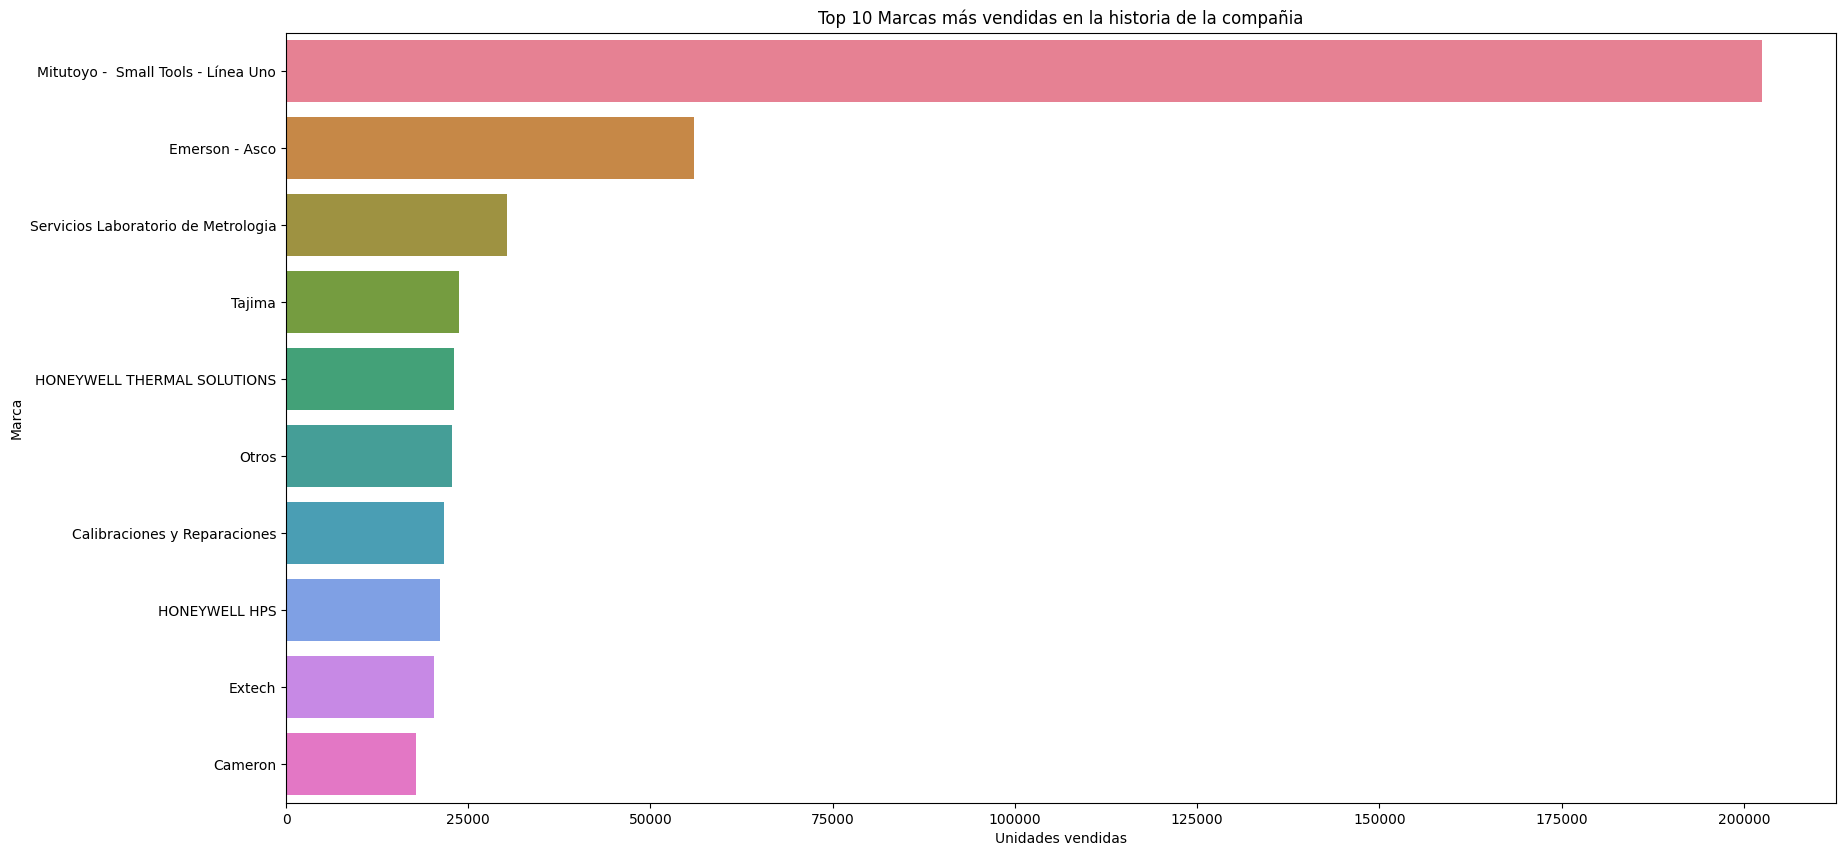

In [ ]:
Marcas=df_final.groupby(['Marca'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,10))
sns.barplot(y = "Marca", x = 'Cantidad', data = Marcas, palette= "husl")
plt.title("Top 10 Marcas más vendidas en la historia de la compañia")
plt.xlabel("Unidades vendidas")
plt.ylabel("Marca")
plt.show()

In [ ]:
df_final = df_final[df_final['Marca'] =='Mitutoyo -  Small Tools - Línea Uno']
df_final = df_final[['Fechadocumento','Descripcionarticulo', 'Numeroarticulo','Cantidad']]
df_final

Fechadocumento                                Descripcionarticulo  \
0          2024-05-31         MICROMETRO DE EXTERIORES  100-200mm/0.01mm   
6          2024-05-31  MICROMETRO INTERIORESCON VARILLAS EXTENSION 50...   
7          2024-05-31          MICROMETROS DE EXTRIORES DIGITAL  25-50mm   
8          2024-05-31     REGLA RIGIDA 12"/300mm - 1/32",1/64",1mm,0.5mm   
9          2024-05-31   MICROMETROS DE EXTRIORES DIGITAL  0-25mm/0.001mm   
...               ...                                                ...   
212323     2004-01-06                     CALIBRADOR DIGITAL DE 8"X200mm   
212346     2003-12-15                              RELOJ COMPARADOR  2mm   
212396     2001-09-02               MICROMETRO DE EXTRIORES 3"-4"/0.001"   
212399     2001-04-25                 MEDIDOR DE ESPESORES 0.05"/0.0001"   
212418     1900-01-01                            JUEGO DE BLOQUES PATRON   

       Numeroarticulo  Cantidad  
0            104-140A         1  
6             137-205         1  
7             193-112         1  
8             182-125         1  
9             193-111         1  
...               ...       ...  
212323        500-197         1  
212346          2113F         1  
212396        103-180         1  
212399          7326S         2  
212418     516-954-60         1  

[73869 rows x 4 columns]

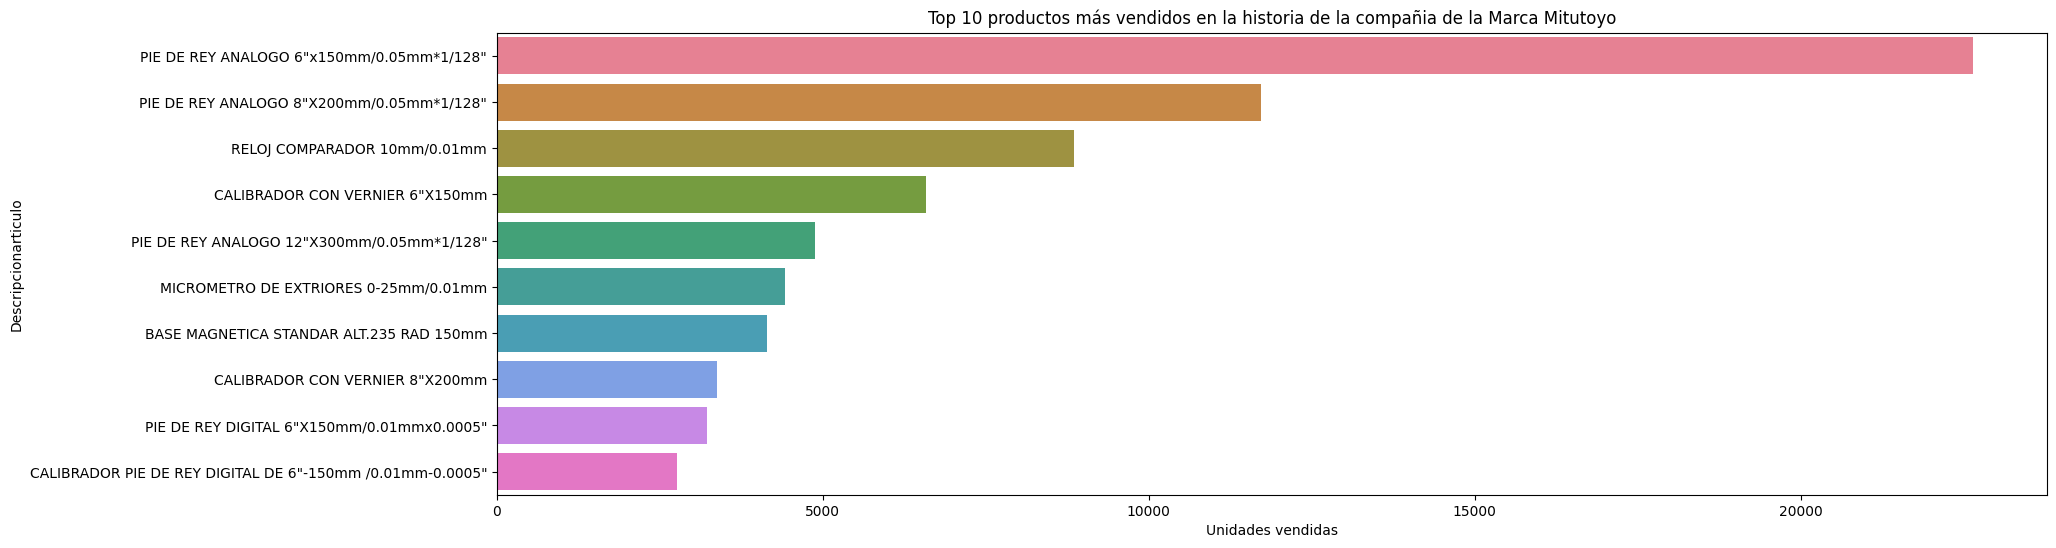

Descripcionarticulo Numeroarticulo  \
2547          PIE DE REY ANALOGO 6"x150mm/0.05mm*1/128"      530-104BR   
2549          PIE DE REY ANALOGO 8"X200mm/0.05mm*1/128"      530-114BR   
3044                       RELOJ COMPARADOR 10mm/0.01mm          2046S   
480                     CALIBRADOR CON VERNIER 6"X150mm        530-104   
2538         PIE DE REY ANALOGO 12"X300mm/0.05mm*1/128"        530-115   
1801              MICROMETRO DE EXTRIORES 0-25mm/0.01mm        103-137   
224            BASE MAGNETICA STANDAR ALT.235 RAD 150mm         7010SN   
489                     CALIBRADOR CON VERNIER 8"X200mm        530-114   
2588         PIE DE REY DIGITAL 6"X150mm/0.01mmx0.0005"    500-196-20B   
721   CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...    500-196-30B   

      Cantidad  
2547     22647  
2549     11719  
3044      8856  
480       6579  
2538      4878  
1801      4415  
224       4139  
489       3380  
2588      3230  
721       2764

In [ ]:
Mas_Vendidos=df_final.groupby(['Descripcionarticulo', 'Numeroarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos en la historia de la compañia de la Marca Mitutoyo")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")

plt.show()
Mas_Vendidos

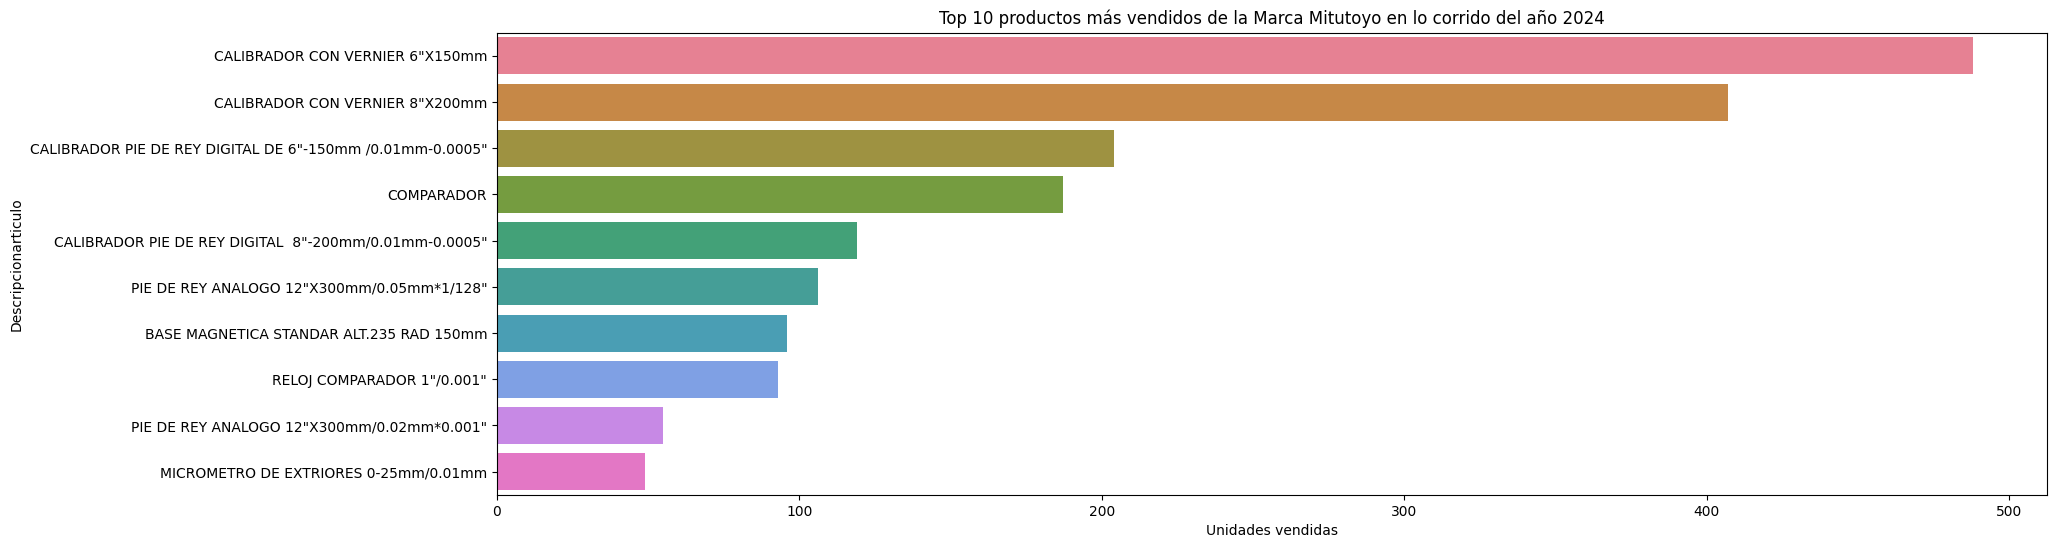

In [ ]:
df_ultimo_año = df_final[df_final['Fechadocumento'].dt.year == 2024]
Mas_Vendidos=df_ultimo_año.groupby(['Descripcionarticulo', 'Numeroarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos de la Marca Mitutoyo en lo corrido del año 2024")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")
plt.show()

In [ ]:
Mas_Vendidos

Descripcionarticulo Numeroarticulo  \
37                     CALIBRADOR CON VERNIER 6"X150mm        530-104   
39                     CALIBRADOR CON VERNIER 8"X200mm        530-114   
66   CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.0...     500-196-30   
69                                          COMPARADOR          2046A   
65   CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm...     500-197-30   
222         PIE DE REY ANALOGO 12"X300mm/0.05mm*1/128"        530-115   
17            BASE MAGNETICA STANDAR ALT.235 RAD 150mm       7010S-10   
258                         RELOJ COMPARADOR 1"/0.001"          2416A   
221         PIE DE REY ANALOGO 12"X300mm/0.02mm*0.001"        530-119   
143              MICROMETRO DE EXTRIORES 0-25mm/0.01mm        103-137   

     Cantidad  
37        488  
39        407  
66        204  
69        187  
65        119  
222       106  
17         96  
258        93  
221        55  
143        49

In [ ]:
df_final.dtypes

Fechadocumento         datetime64[ns]
Descripcionarticulo            object
Numeroarticulo                 object
Cantidad                        int64
dtype: object

In [ ]:
#Mas_Vendidos.to_csv('Mas_Vendidos.csv', index=False)

In [ ]:
top_vendidos = Mas_Vendidos['Descripcionarticulo'].iloc[:5].to_numpy()
nombres_productos = top_vendidos
top_vendidos

array(['CALIBRADOR CON VERNIER 6"X150mm',
       'CALIBRADOR CON VERNIER 8"X200mm',
       'CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"',
       'COMPARADOR',
       'CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"'],
      dtype=object)

In [ ]:
df_final

Fechadocumento                                Descripcionarticulo  \
0          2024-05-31         MICROMETRO DE EXTERIORES  100-200mm/0.01mm   
6          2024-05-31  MICROMETRO INTERIORESCON VARILLAS EXTENSION 50...   
7          2024-05-31          MICROMETROS DE EXTRIORES DIGITAL  25-50mm   
8          2024-05-31     REGLA RIGIDA 12"/300mm - 1/32",1/64",1mm,0.5mm   
9          2024-05-31   MICROMETROS DE EXTRIORES DIGITAL  0-25mm/0.001mm   
...               ...                                                ...   
212323     2004-01-06                     CALIBRADOR DIGITAL DE 8"X200mm   
212346     2003-12-15                              RELOJ COMPARADOR  2mm   
212396     2001-09-02               MICROMETRO DE EXTRIORES 3"-4"/0.001"   
212399     2001-04-25                 MEDIDOR DE ESPESORES 0.05"/0.0001"   
212418     1900-01-01                            JUEGO DE BLOQUES PATRON   

       Numeroarticulo  Cantidad  
0            104-140A         1  
6             137-205         1  
7             193-112         1  
8             182-125         1  
9             193-111         1  
...               ...       ...  
212323        500-197         1  
212346          2113F         1  
212396        103-180         1  
212399          7326S         2  
212418     516-954-60         1  

[73869 rows x 4 columns]

In [ ]:
def process_sales_data(df, article_description, start_date, resample_kind):


    df_grouped = df.copy()

    # Filtrar por descripción del artículo
    df_grouped = df_grouped[df_grouped['Descripcionarticulo'] == article_description]

    # Filtrar por fecha de inicio
    df_grouped = df_grouped[df_grouped['Fechadocumento'] >= start_date]

    # Seleccionar las columnas de interés y establecer el índice
    df_grouped = df_grouped[['Fechadocumento', 'Cantidad']]
    df_grouped.set_index('Fechadocumento', inplace=True)

    # Ordenar por índice
    df_grouped = df_grouped.sort_index(ascending=True)

    # Remuestrear y sumar los datos
    df_grouped = df_grouped.resample(resample_kind).sum()

    # Ordenar por índice nuevamente (opcional, ya está ordenado)
    df_grouped = df_grouped.sort_index(ascending=True)

    # Renombrar la columna
    df_grouped = df_grouped.rename(columns={'Cantidad': article_description})

    # Imprimir rango de fechas
    print("Desde:", df_grouped.index[0])
    print("Hasta:", df_grouped.index[-1])

    # Imprimir el conteo de registros
    print(df_grouped.count())

    return df_grouped

In [ ]:
start_date = '2020-06-01'
resample_kind = 'M'
df_grouped = process_sales_data(df_final, top_vendidos[0], start_date, resample_kind)

Desde: 2021-09-30 00:00:00
Hasta: 2024-05-31 00:00:00
CALIBRADOR CON VERNIER 6"X150mm    33
dtype: int64


In [ ]:
start_date = '2020-09-01'
resample_kind = 'M'
df_grouped2 = process_sales_data(df_final, top_vendidos[1], start_date, resample_kind)

Desde: 2021-07-31 00:00:00
Hasta: 2024-05-31 00:00:00
CALIBRADOR CON VERNIER 8"X200mm    35
dtype: int64


In [ ]:
start_date = '2004-01-01'
resample_kind = 'M'
df_grouped3 = process_sales_data(df_final, top_vendidos[2], start_date, resample_kind)

Desde: 2015-02-28 00:00:00
Hasta: 2024-05-31 00:00:00
CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"    112
dtype: int64


In [ ]:
start_date = '2020-01-01'
resample_kind = 'M'
df_grouped4 = process_sales_data(df_final, top_vendidos[3], start_date, resample_kind)

Desde: 2021-12-31 00:00:00
Hasta: 2024-05-31 00:00:00
COMPARADOR    30
dtype: int64


In [ ]:
start_date = '2004-01-01'
resample_kind = 'M'
df_grouped5 = process_sales_data(df_final, top_vendidos[4], start_date, resample_kind)

Desde: 2015-02-28 00:00:00
Hasta: 2024-05-31 00:00:00
CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"    112
dtype: int64


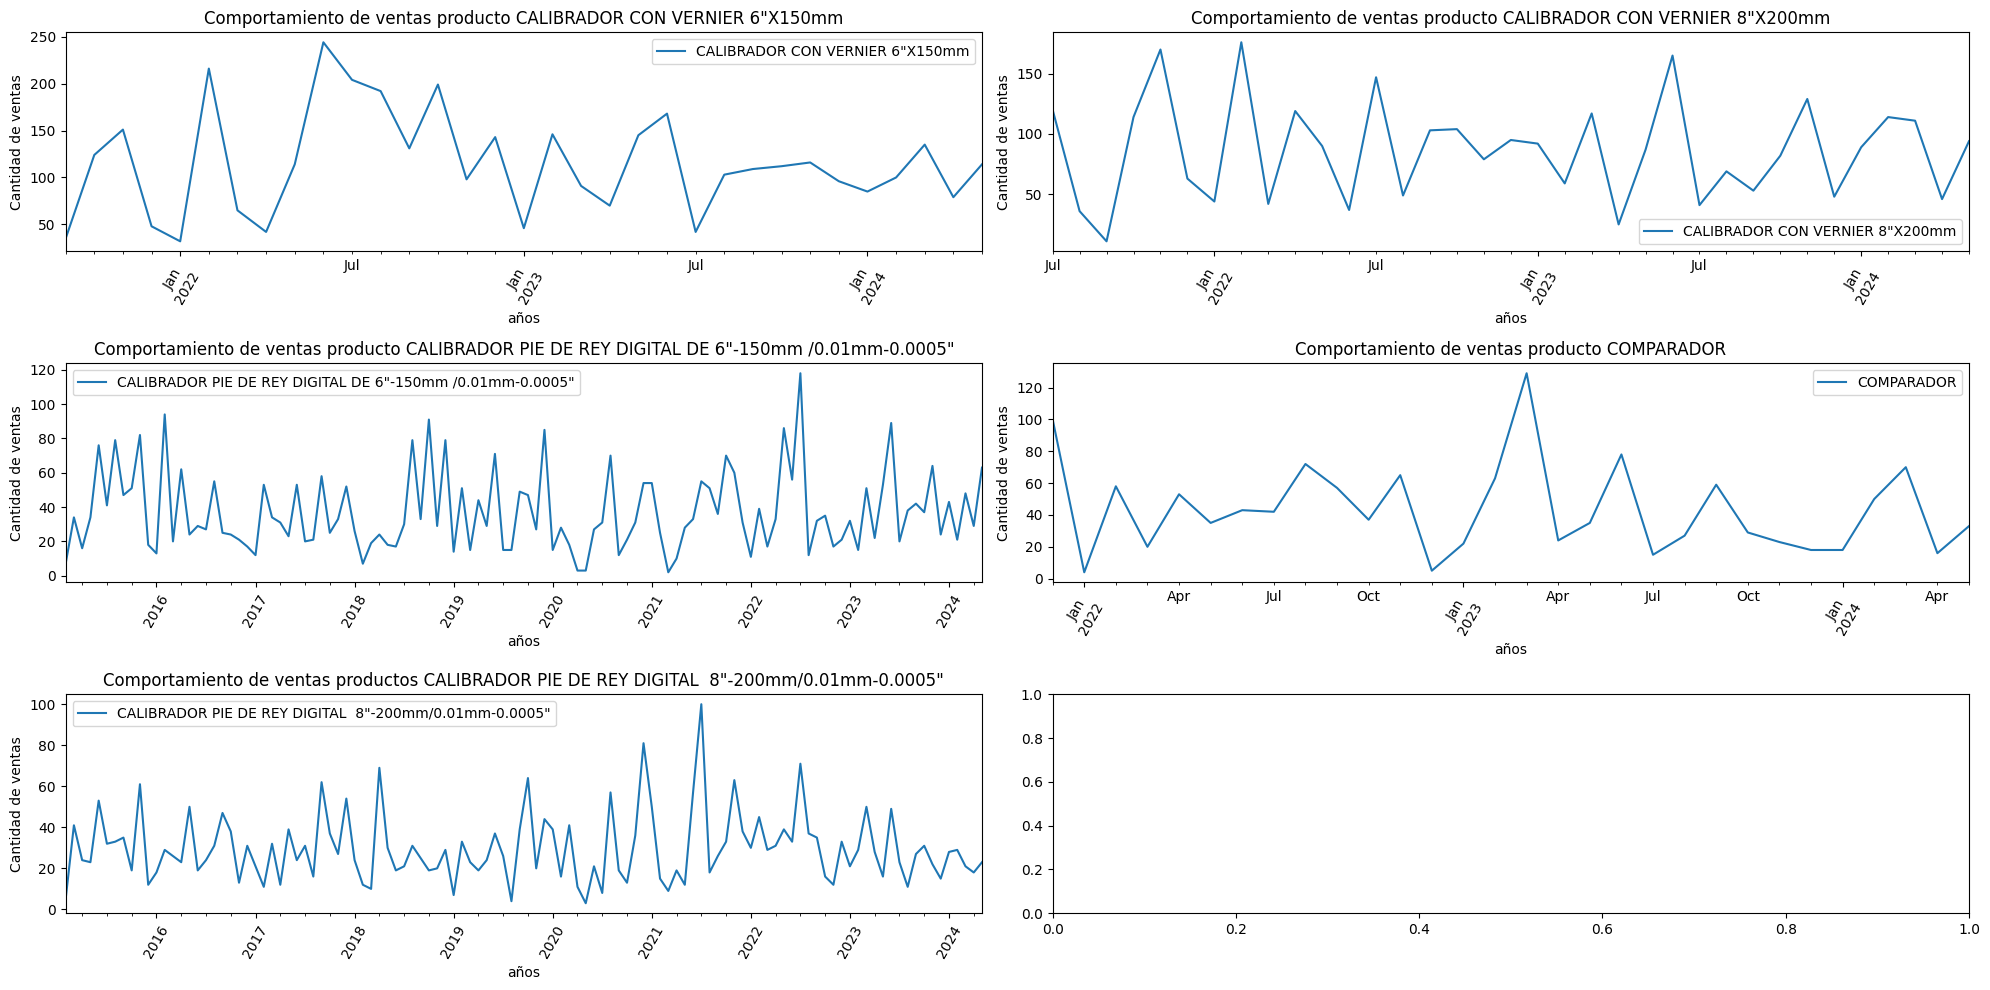

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10],ncols=2, nrows=3)

ax1=df_grouped.plot(kind="line",ax=axs[0,0])
ax1.set_title("Comportamiento de ventas producto "+ top_vendidos[0])
ax1.set_xlabel("años")
ax1.set_ylabel("Cantidad de ventas")
ax1.tick_params(axis='x', labelrotation=60)

ax2=df_grouped2.plot(kind="line",ax=axs[0,1])
ax2.set_title("Comportamiento de ventas producto "+ top_vendidos[1])
ax2.set_xlabel("años")
ax2.set_ylabel("Cantidad de ventas")
ax2.tick_params(axis='x', labelrotation=60)

ax3=df_grouped3.plot(kind="line",ax=axs[1,0])
ax3.set_title("Comportamiento de ventas producto "+ top_vendidos[2])
ax3.set_xlabel("años")
ax3.set_ylabel("Cantidad de ventas")
ax3.tick_params(axis='x', labelrotation=60)

ax4=df_grouped4.plot(kind="line",ax=axs[1,1])
ax4.set_title("Comportamiento de ventas producto "+ top_vendidos[3])
ax4.set_xlabel("años")
ax4.set_ylabel("Cantidad de ventas")
ax4.tick_params(axis='x', labelrotation=60)

ax5=df_grouped5.plot(kind="line",ax=axs[2,0])
ax5.set_title("Comportamiento de ventas productos "+ top_vendidos[4])
ax5.set_xlabel("años")
ax5.set_ylabel("Cantidad de ventas")
ax5.tick_params(axis='x', labelrotation=60)


fig.tight_layout()
plt.show()

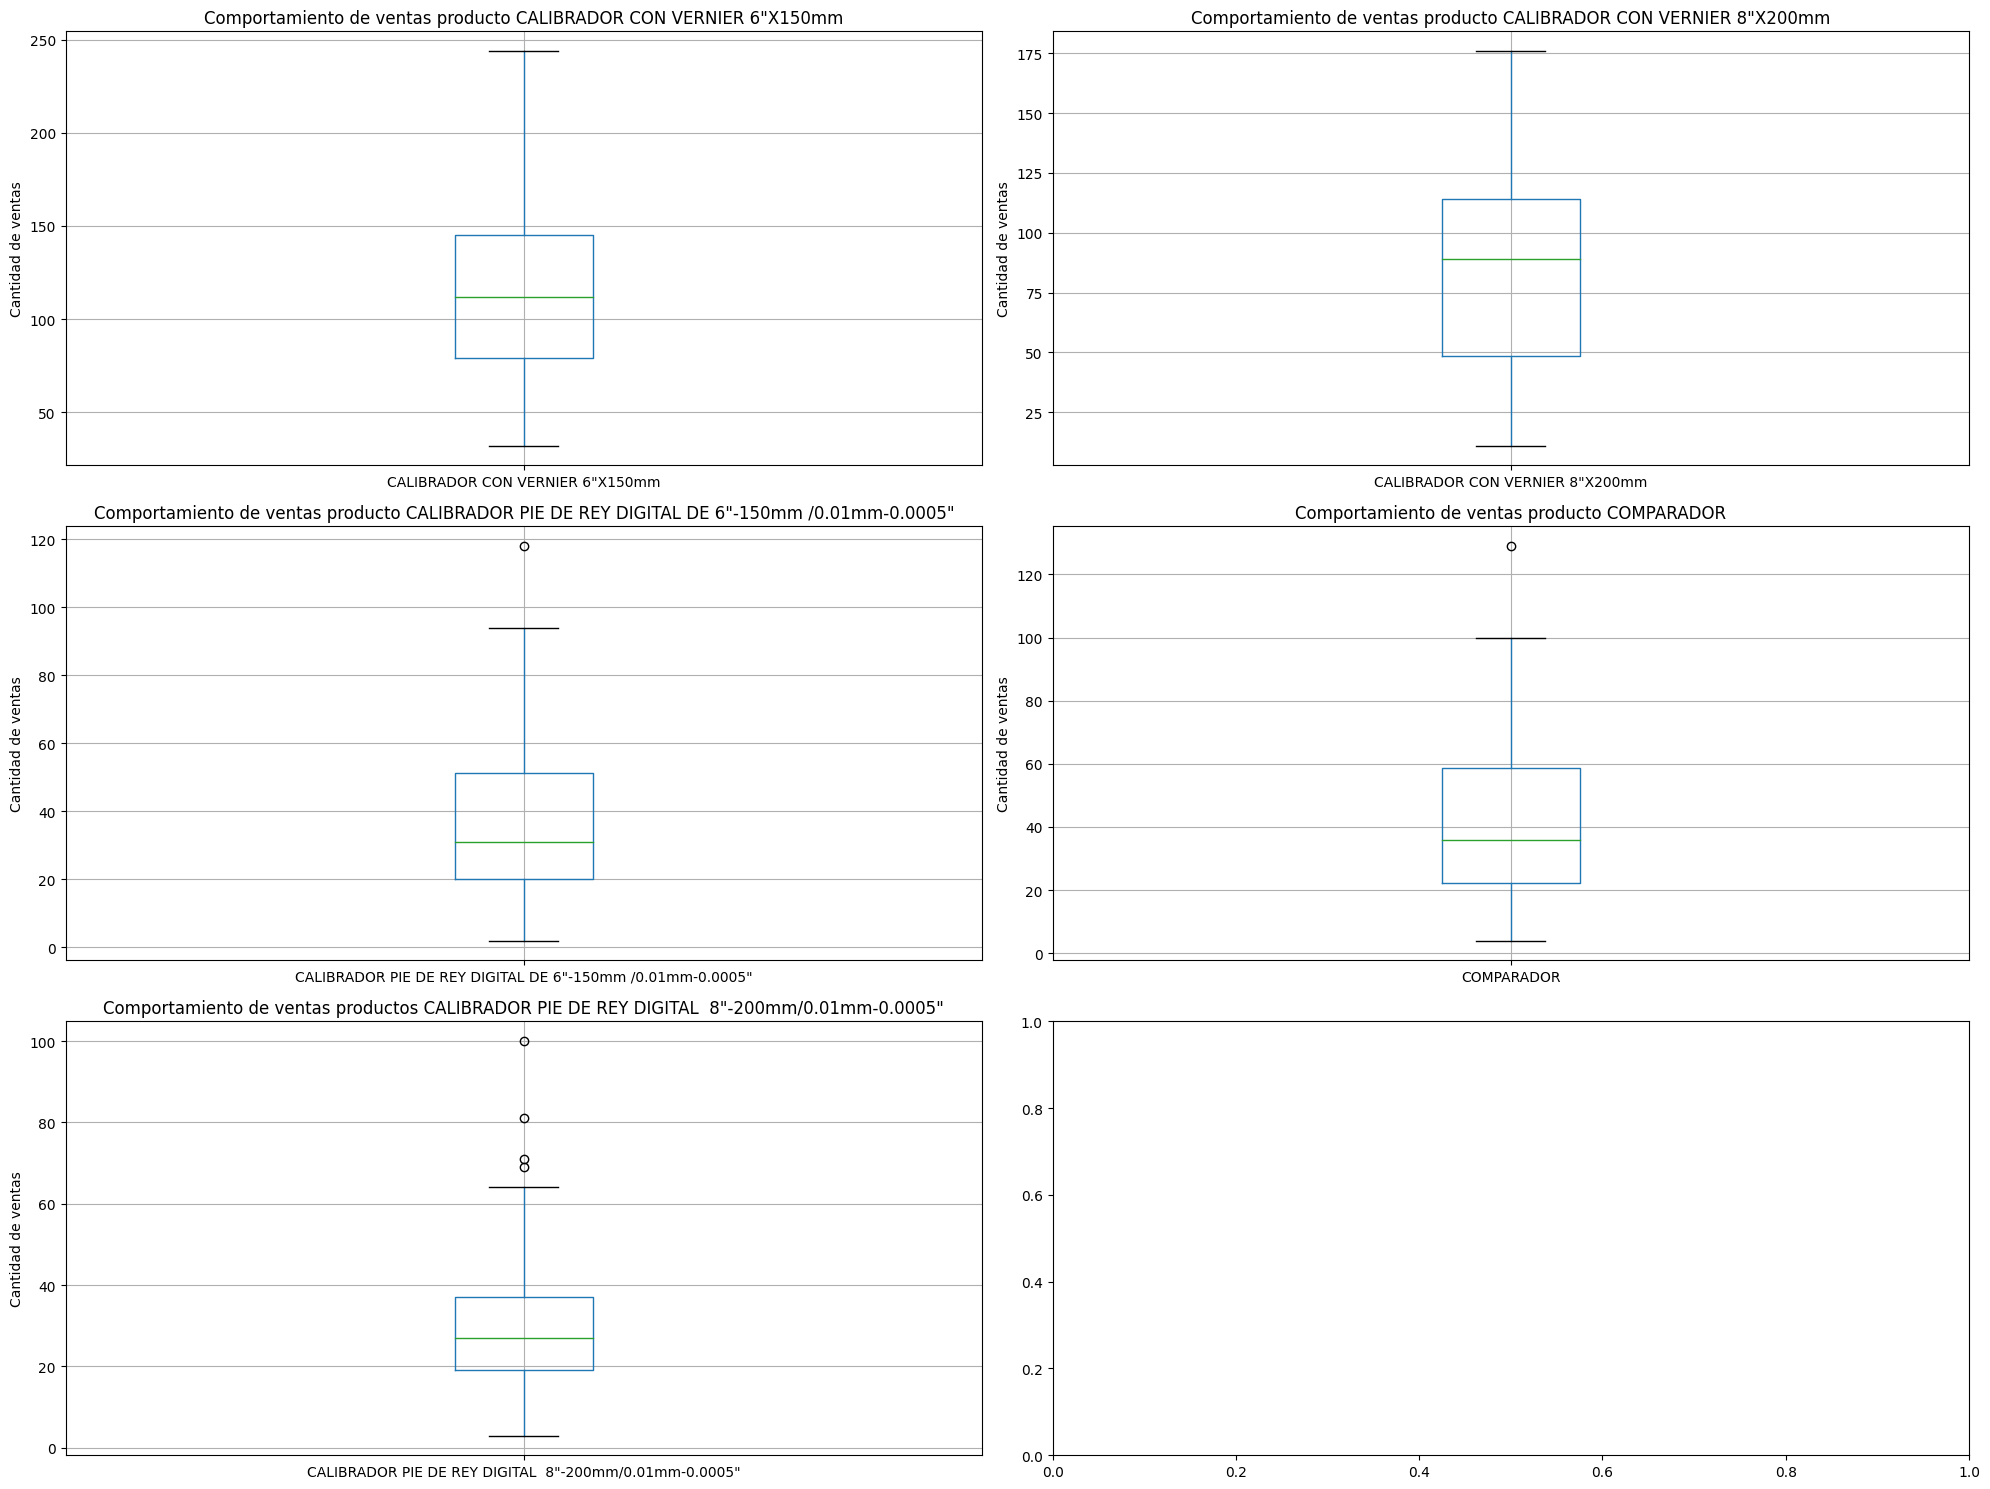

In [ ]:
fig, axs = plt.subplots(figsize=[20, 15],ncols=2, nrows=3)

ax1=df_grouped.boxplot(ax=axs[0,0])
ax1.set_title("Comportamiento de ventas producto "+ top_vendidos[0])
ax1.set_ylabel("Cantidad de ventas")

ax2=df_grouped2.boxplot(ax=axs[0,1])
ax2.set_title("Comportamiento de ventas producto "+ top_vendidos[1])
ax2.set_ylabel("Cantidad de ventas")

ax3=df_grouped3.boxplot(ax=axs[1,0])
ax3.set_title("Comportamiento de ventas producto "+ top_vendidos[2])
ax3.set_ylabel("Cantidad de ventas")

ax4=df_grouped4.boxplot(ax=axs[1,1])
ax4.set_title("Comportamiento de ventas producto "+ top_vendidos[3])
ax4.set_ylabel("Cantidad de ventas")

ax5=df_grouped5.boxplot(ax=axs[2,0])
ax5.set_title("Comportamiento de ventas productos "+ top_vendidos[4])
ax5.set_ylabel("Cantidad de ventas")

fig.tight_layout()
plt.show()

In [ ]:
def plot_seasonal_decompose(series, model='additive', freq=None):
    # Realizar la descomposición estacional
    res_decompose = seasonal_decompose(series, model=model, extrapolate_trend='freq', period=freq)

    # Crear una figura con 4 subgráficos en una columna
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)

    # Graficar la serie original
    res_decompose.observed.plot(ax=axs[0])
    axs[0].set_title('Serie original')

    # Graficar la tendencia
    res_decompose.trend.plot(ax=axs[1])
    axs[1].set_title('Tendencia')

    # Graficar la estacionalidad
    res_decompose.seasonal.plot(ax=axs[2])
    axs[2].set_title('Estacionalidad')

    # Graficar los residuos
    res_decompose.resid.plot(ax=axs[3])
    axs[3].set_title('Residuos')

    # Mostrar la gráfica
    plt.show()

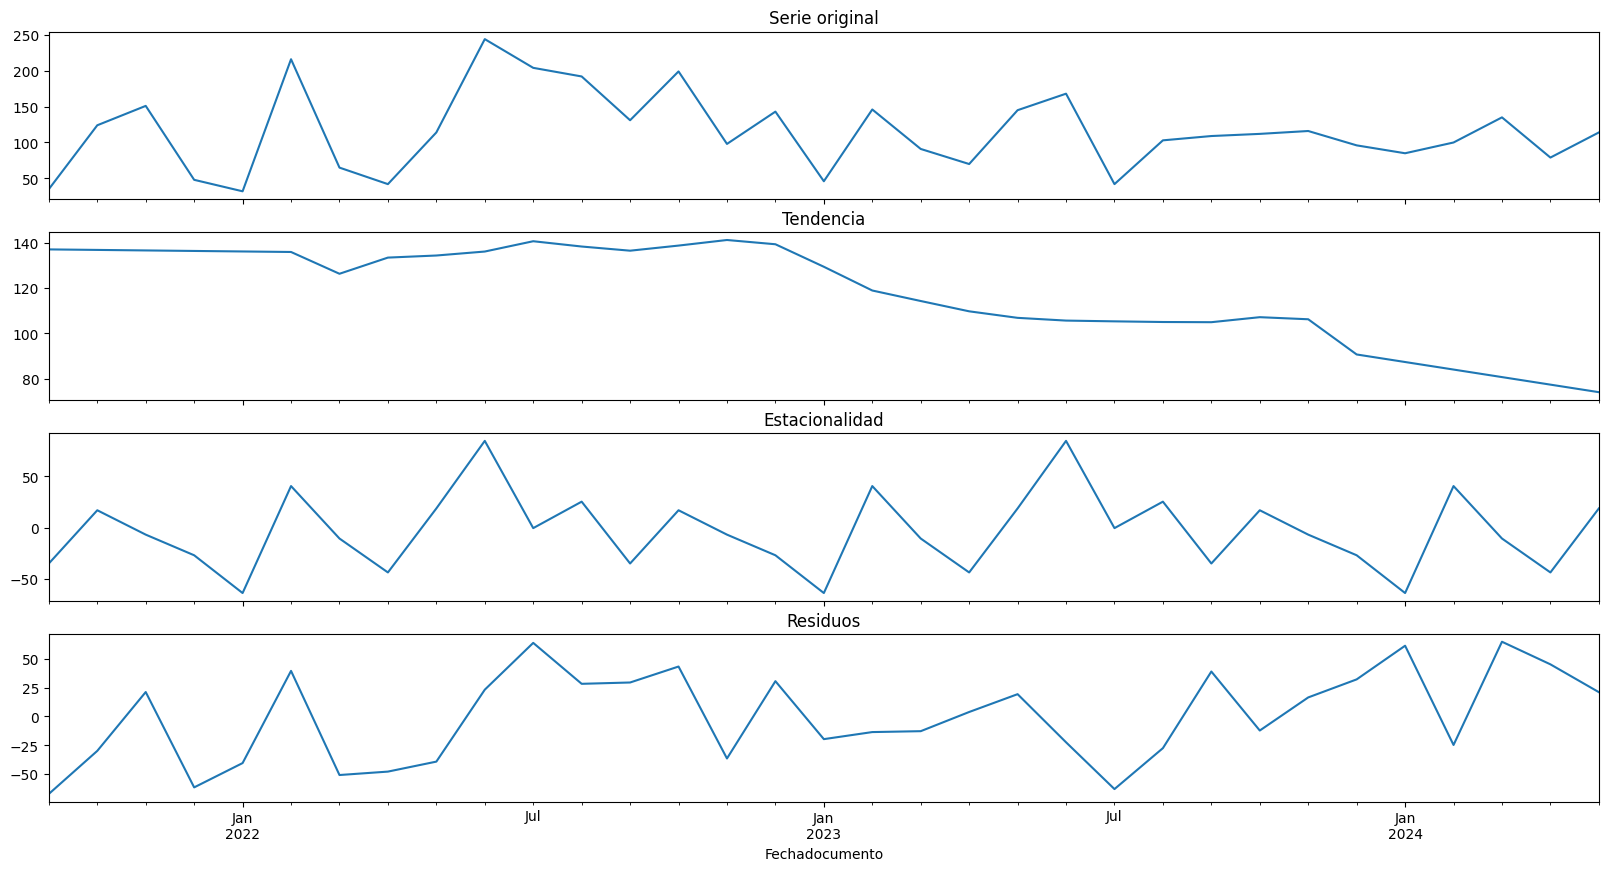

In [ ]:
plot_seasonal_decompose(df_grouped[nombres_productos[0]], model='additive', freq=12)

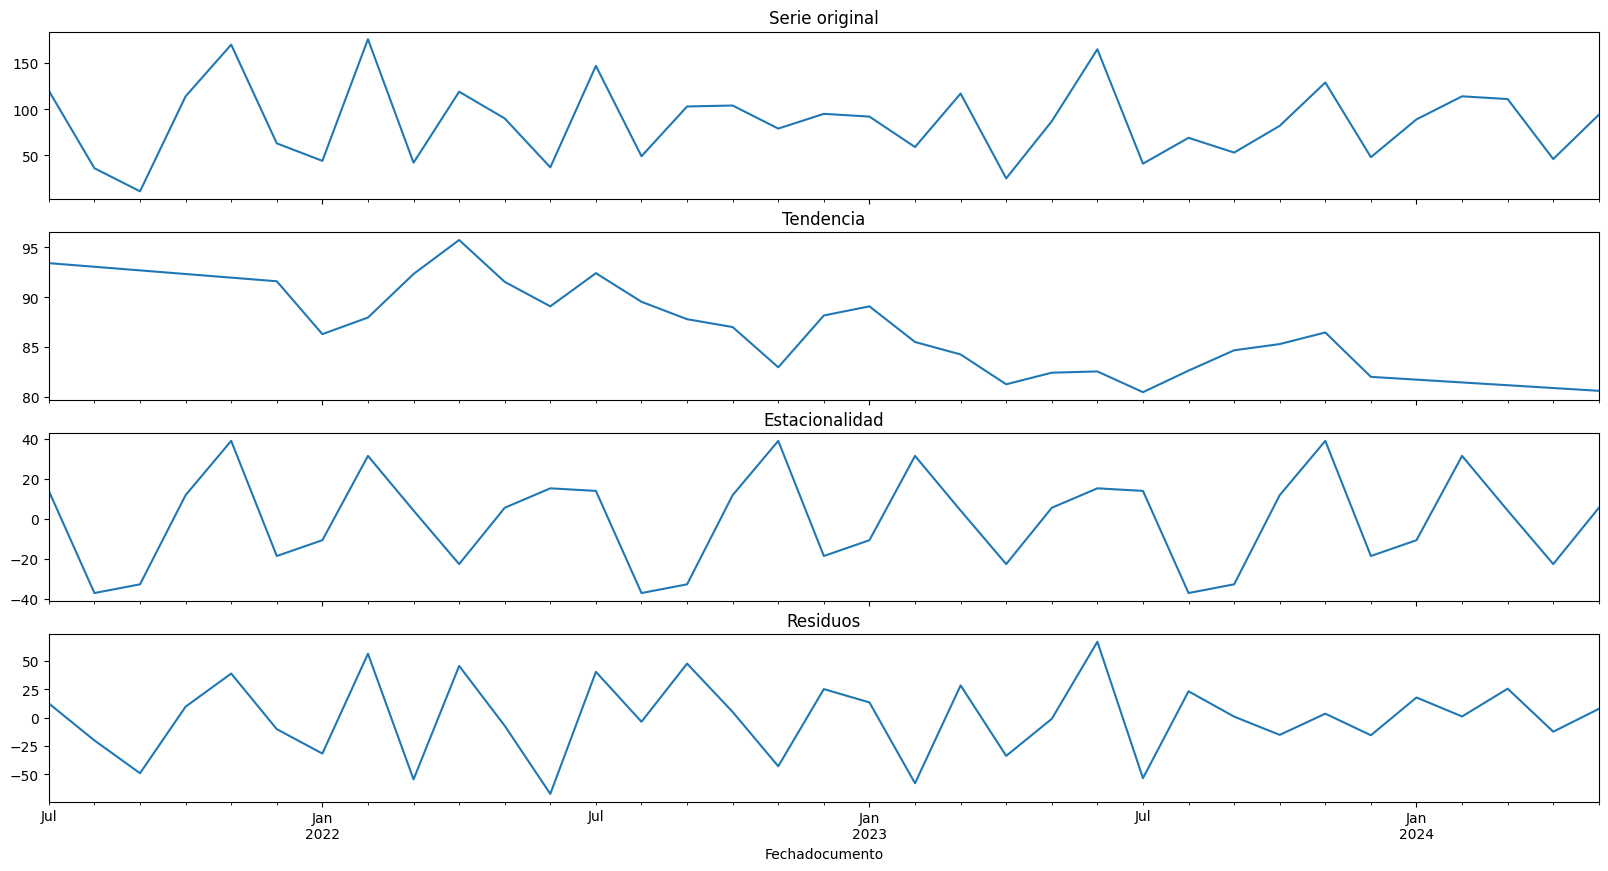

In [ ]:
plot_seasonal_decompose(df_grouped2[nombres_productos[1]], model='additive', freq=12)

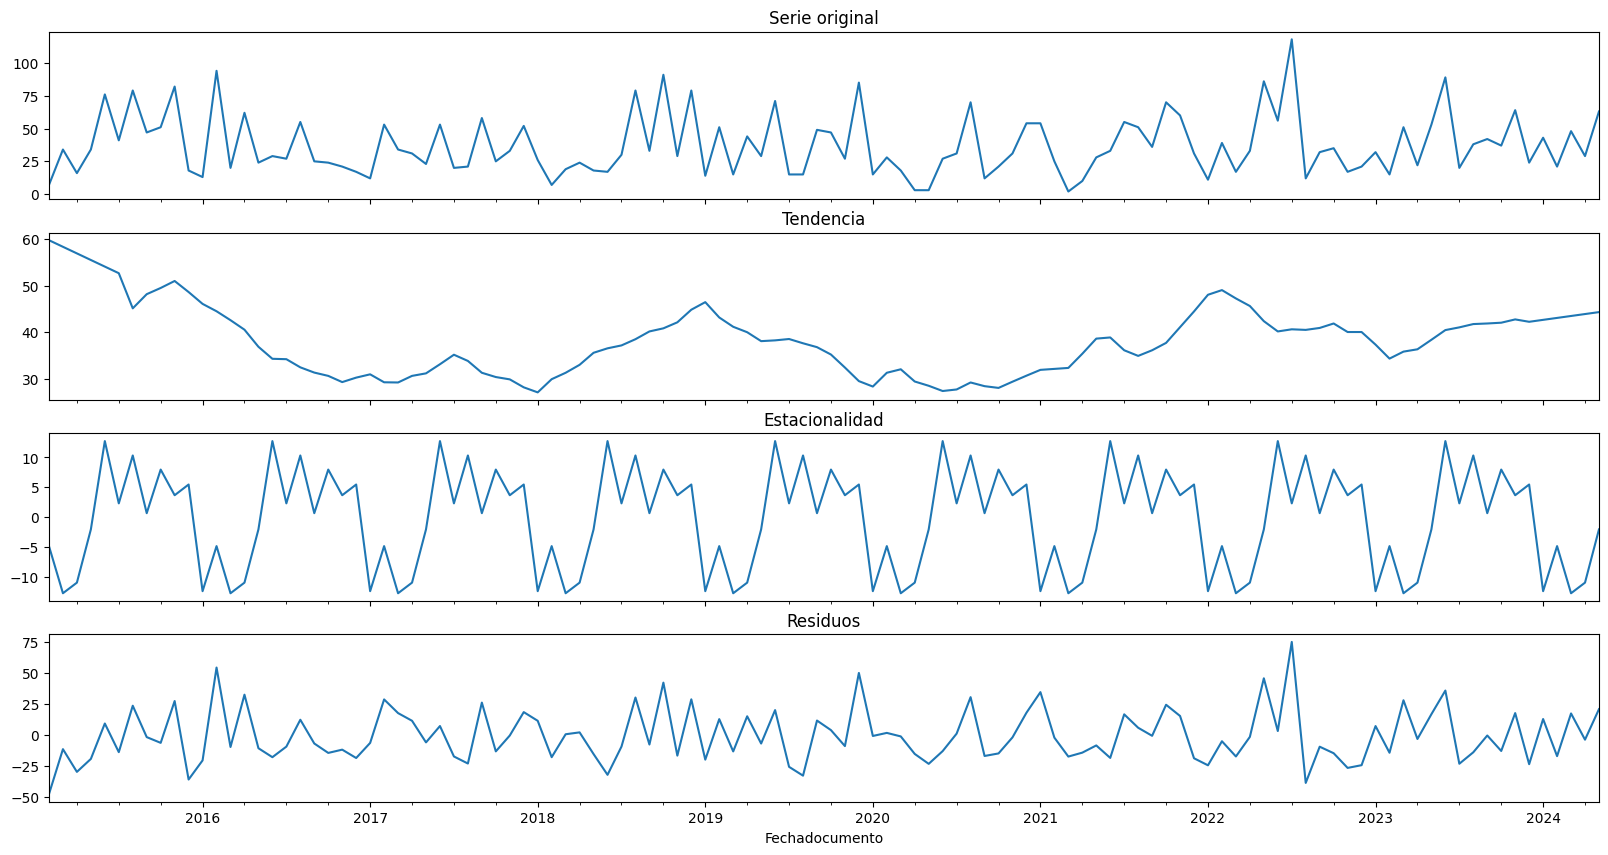

In [ ]:
plot_seasonal_decompose(df_grouped3[nombres_productos[2]], model='additive', freq=12)

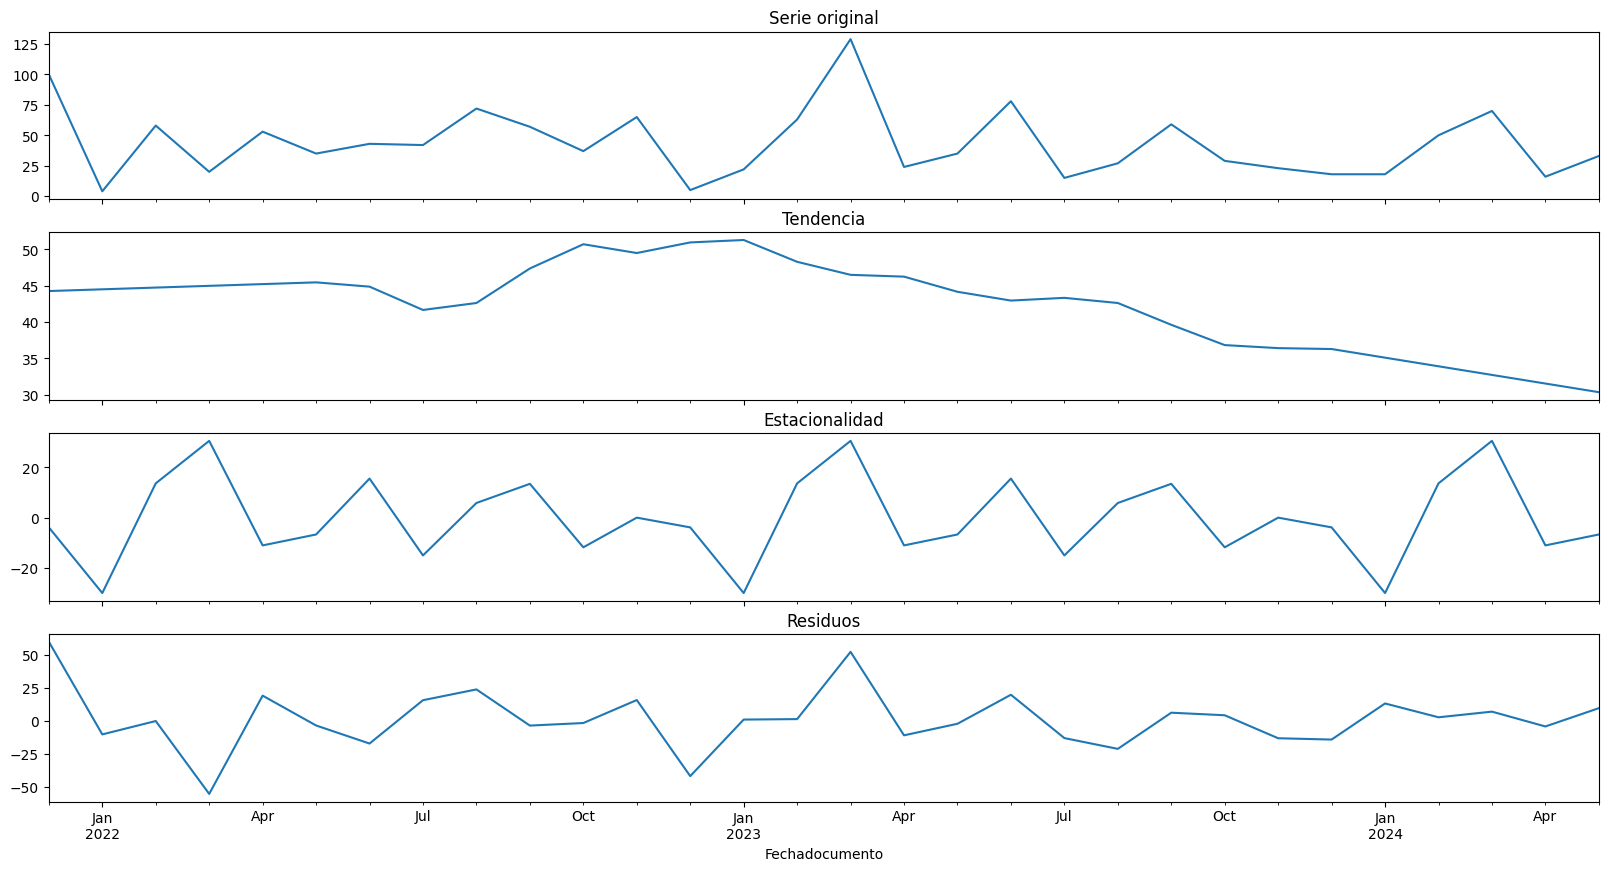

In [ ]:
plot_seasonal_decompose(df_grouped4[nombres_productos[3]], model='additive', freq=12)

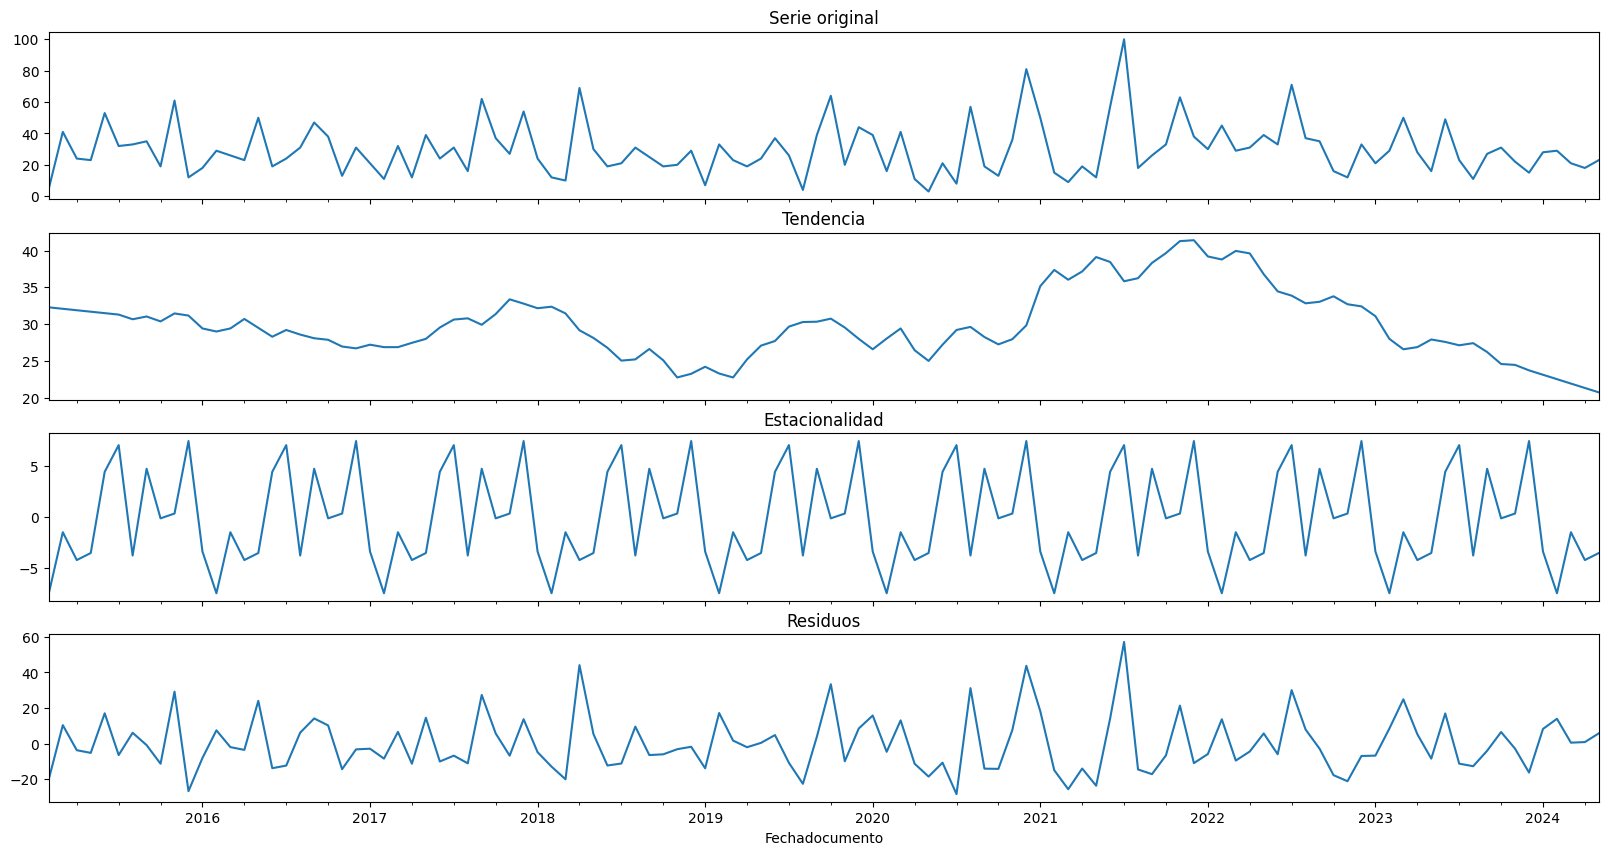

In [ ]:
plot_seasonal_decompose(df_grouped5[nombres_productos[4]], model='additive', freq=12)

In [ ]:
Periodos_pronostico = 3
Ventana_1 = 24
Ventana_2 = 36
Ventana_3 = 48
Ventana_4 = 60

## PRONOSTICOS PARA PRODUCTO 1

In [ ]:

train_len = df_grouped.shape[0]-Periodos_pronostico
train_td = df_grouped[:train_len]
test_td = df_grouped[train_len:]
test_td


CALIBRADOR CON VERNIER 6"X150mm
Fechadocumento                                 
2024-03-31                                  135
2024-04-30                                   79
2024-05-31                                  114

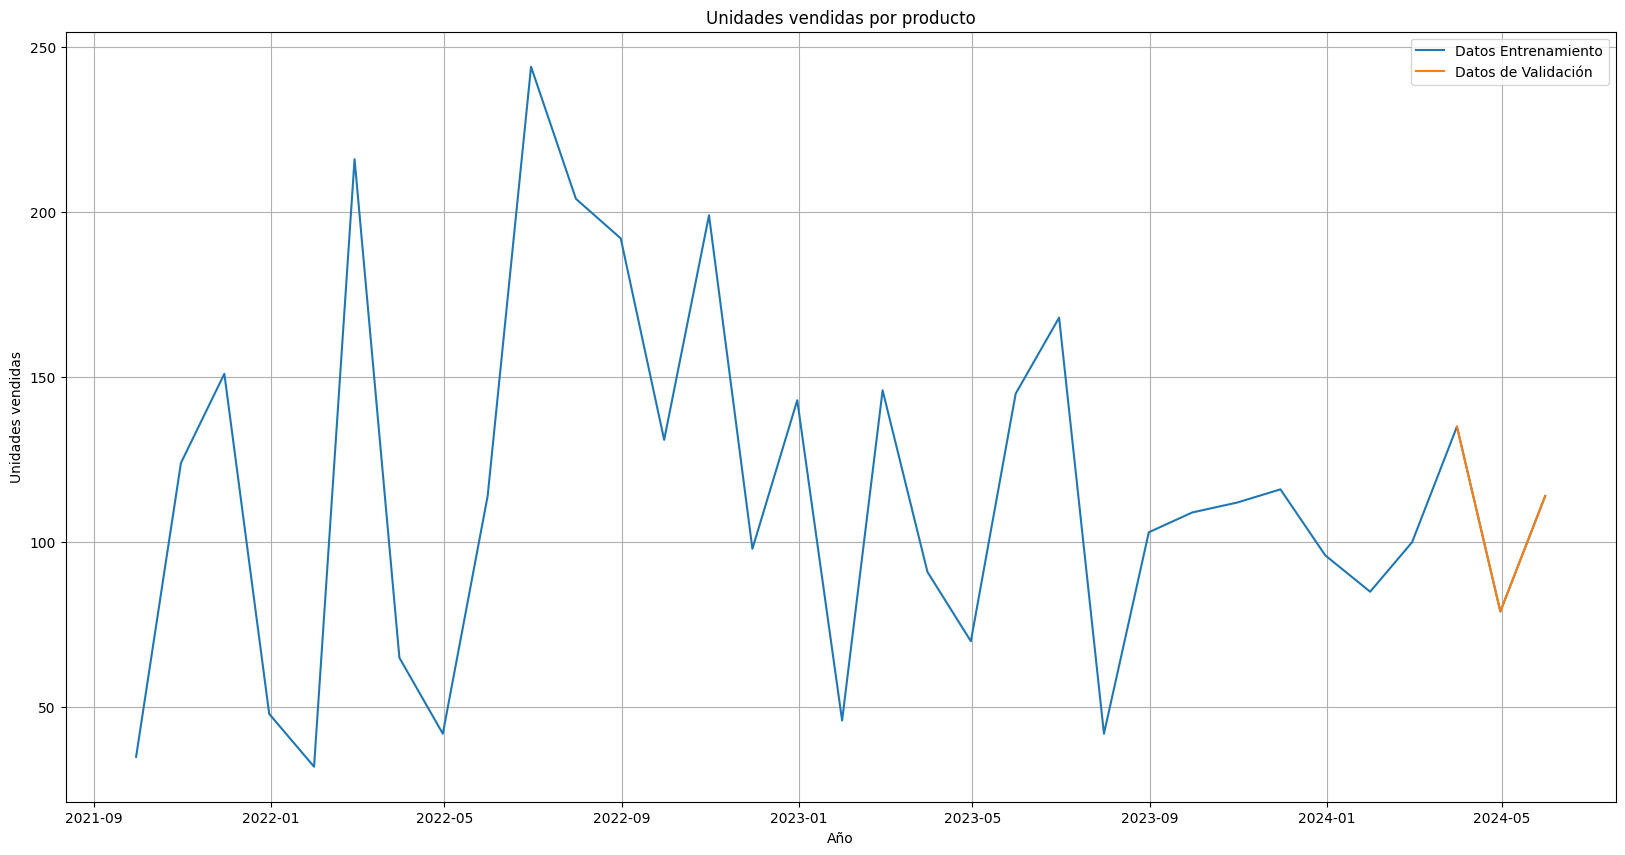

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(df_grouped[nombres_productos[0]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[0]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [ ]:
def MA_opt(fore, w, data):

    h = 1
    errores = []

    for n in range(2,6):
        forecast_all = []

        for i in range(0, fore):
            train = data[(-w-fore+i):(-fore+i)]
            datos = train.copy()

            for x in range(1,h+1):
                ind = datos.index[-1]
                value = ind + pd.DateOffset(months=1)
                datos.loc[value]= datos[-n:].mean()

            forecast = datos[-h:]
            forecast_all.append(forecast)

        test = data[-fore:]
        errores.append([n, mean_squared_error(test, forecast_all, squared=False)])

    return errores

In [ ]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[0]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [ ]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 12.99 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [ ]:
def Holt_Winters_opt(fore, w, data):

  def objetivo(error,trend,seasonal,alpha,beta,gamma):

      alpha = round(alpha,2)
      beta  = round(beta,2)
      gamma = round(gamma,2)
      error1 = ["add", "mul"]
      trend1 = ["add", "mul", None]
      seasonal1 = ["add", "mul", None]

      forecast_all = []
      for i in range(0,fore):
          train = data[(-w-fore+i):(-fore+i)]
          model = ETSModel(endog = train, error = error1[round(error)], trend = trend1[round(trend)], seasonal = seasonal1[round(seasonal)])
          params = {'smoothing_level': alpha,'smoothing_trend': beta,'smoothing_seasonal':gamma}

          if trend1[round(trend)] == None:
            params.pop('smoothing_trend')
          if seasonal1[round(seasonal)] == None:
            params.pop('smoothing_seasonal')

          results = model.fit_constrained(params)
          forecast = results.forecast(1)
          forecast_all.append(forecast)

      test = data[-fore:]
      return -mean_squared_error(test, forecast_all, squared=False)

  search_space = {
     'error': (0, 1),
     'trend': (0, 2),
     'seasonal': (0, 2),
     'alpha': (0.01, 0.99),
     'beta': (0.01, 0.99),
     'gamma': (0.01, 0.99)
     }

  optimizer = BayesianOptimization(f = objetivo,
                                   pbounds = search_space,
                                   random_state=1,
                                   verbose=1)
  optimizer.maximize(init_points = 5, n_iter = 100)
  #print("\nFinal result:", optimizer.max)
  return optimizer

def best_model_hw(i, j, result):
   resumen = []
   error1 = ["add", "mul"]
   trend1 = ["add", "mul", None]
   seasonal1 = ["add", "mul", None]

   rmse_hw = round(-result.max['target'],2)
   alpha = round(result.max['params']['alpha'],2)
   beta = round(result.max['params']['beta'],2)
   gamma = round(result.max['params']['gamma'],2)
   error = error1[round(result.max['params']['error'])]
   trend = trend1[round(result.max['params']['trend'])]
   seasonal = seasonal1[round(result.max['params']['seasonal'])]

   resumen =[i, j, rmse_hw, alpha, beta, gamma, error, trend, seasonal]

   return resumen

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 4         | -61.64    | 0.1476    | 0.2041    | 0.8007    | 0.9589    | 0.6268    | 1.385     |
| 11        | -24.51    | 0.6901    | 0.5721    | 0.3291    | 0.7056    | 1.595     | 0.06075   |
| 31        | -20.86    | 0.8138    | 0.8492    | 0.4136    | 0.8106    | 1.991     | 1.394     |
| 38        | -12.11    | 0.3286    | 0.05172   | 0.2561    | 0.2863    | 1.775     | 0.7584    |
| 104       | -11.34    | 0.2505    | 0.3277    | 0.399     | 0.8603    | 1.535     | 0.3756    |


In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.25, beta = 0.33, gamma = 0.86, error = add, trend = add, seasonal = None, RMSE = 11.34


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [ ]:
runstest_1samp(train_td[nombres_productos[0]], correction=False)

(-0.277627151437034, 0.7812985873523625)

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[0]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.152604   0.696060   0.138297   0.709980  no_rechazo_ho/no_hay_autocorr   
2    0.455458   0.796340   0.403295   0.817383  no_rechazo_ho/no_hay_autocorr   
3    1.013834   0.797905   0.874424   0.831595  no_rechazo_ho/no_hay_autocorr   
4    4.123044   0.389610   3.400658   0.493143  no_rechazo_ho/no_hay_autocorr   
5    7.117896   0.212019   5.740386   0.332306  no_rechazo_ho/no_hay_autocorr   
6    7.472727   0.279331   6.006509   0.422461  no_rechazo_ho/no_hay_autocorr   
7    8.242855   0.311667   6.560039   0.476077  no_rechazo_ho/no_hay_autocorr   
8    8.615775   0.375737   6.816421   0.556563  no_rechazo_ho/no_hay_autocorr   
9   10.960712   0.278412   8.355286   0.498776  no_rechazo_ho/no_hay_autocorr   
10  11.192201   0.342741   8.499967   0.580122  no_rechazo_ho/no_hay_autocorr   
11  11.539529   0.399230   8.706192   0.648991  no_rechazo_ho/no_hay_autocorr   
12  12.175022   0.431728   9.063657   0.697484  no_rechazo_ho/no_hay_autocorr   
13  13.905114   0.380560   9.982768   0.695343  no_rechazo_ho/no_hay_autocorr   
14  15.321855   0.356513  10.691139   0.710111  no_rechazo_ho/no_hay_autocorr   
15  15.558419   0.411990  10.802029   0.766498  no_rechazo_ho/no_hay_autocorr   
16  16.622456   0.410425  11.267545   0.792678  no_rechazo_ho/no_hay_autocorr   
17  20.279111   0.260203  12.753061   0.752554  no_rechazo_ho/no_hay_autocorr   
18  20.308787   0.315706  12.764189   0.805387  no_rechazo_ho/no_hay_autocorr   
19  20.658031   0.356000  12.884242   0.844444  no_rechazo_ho/no_hay_autocorr   
20  20.830470   0.407171  12.938129   0.880023  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [ ]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9573336839675903, pvalue=0.2643738389015198)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.3031047736695127, pvalue=0.5212359884849875)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[0]]-train_td[nombres_productos[0]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.831646   0.361797   0.753679   0.385314
2    2.341074   0.310200   2.074428   0.354441
3    2.348189   0.503352   2.080432   0.555882
4    5.983090   0.200415   5.033789   0.283848
5    6.799102   0.236015   5.671298   0.339528
6    8.373889   0.211971   6.852389   0.334714
7    8.376398   0.300576   6.854192   0.444218
8    9.519579   0.300376   7.640129   0.469389
9    9.687563   0.376366   7.750368   0.559486
10   9.852369   0.453540   7.853372   0.643157
11   9.854803   0.543493   7.854817   0.726247
12   9.880406   0.626452   7.869219   0.795265
13   9.925009   0.700055   7.892914   0.850506
14  12.135015   0.595461   8.997917   0.831184
15  14.024026   0.523708   9.883391   0.827010
16  15.463328   0.491001  10.513086   0.838497
17  15.929756   0.528820  10.702572   0.871601
18  17.675783   0.477195  11.357332   0.878583
19  19.661487   0.415200  12.039918   0.883912
20  23.334896   0.272651  13.187859   0.869179

#### **6.3 Normalidad**

In [ ]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9573336839675903, pvalue=0.2643738389015198)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.3031047736695127, pvalue=0.5212359884849875)

#### **6.4 Modelo**

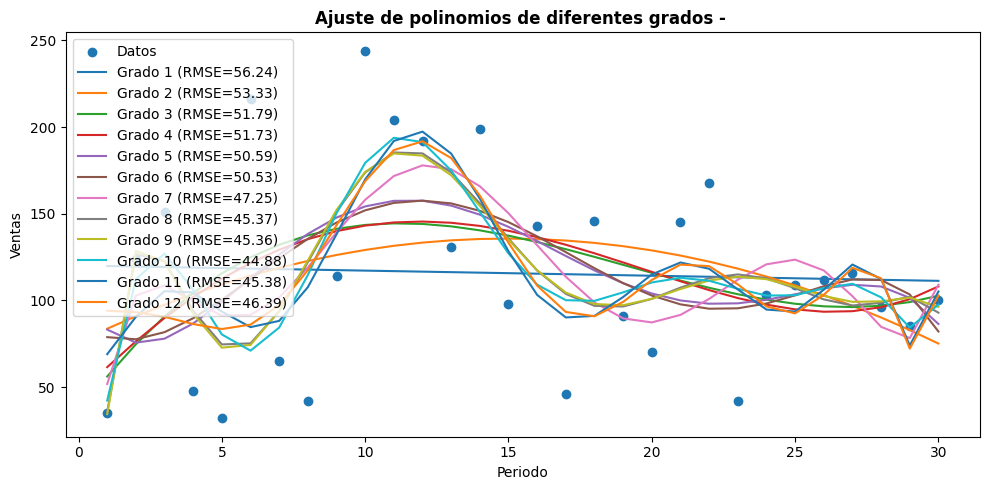

In [ ]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={mean_squared_error(y, y_pred, squared=False):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_10(fore, w, data, objetivo):

    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7
        train.loc[:,"x8"] = x**8
        train.loc[:,"x9"] = x**9
        train.loc[:,"x10"] = x**10

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8,x_for**9,x_for**10),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return mean_squared_error(test, forecast_all, squared=False)

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_10(j, i, train_td, nombres_productos[0])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 645.64


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [ ]:
datos_diff_1_12 = train_td[nombres_productos[0]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -5.919973338424765, p-value: 2.5199582570925285e-07
KPSS Statistic: 0.29568130183766145, p-value: 0.1


In [ ]:
from pmdarima.arima import ARIMA
def ARIMA_opt(fore, w, data):

    def objetivo(P, D, Q):

        forecast_all = []
        for i in range(0,fore):

            train = data[(-w-fore+i):(-fore+i)]
            model = ARIMA(order=(round(P), round(D), round(Q)))
            model.fit(train)
            forecast = model.predict(1).iloc[0]
            forecast_all.append(forecast)


        test = data[-fore:]
        return -mean_squared_error(test, forecast_all, squared=False)

    search_space = {
        'P': (0, 3),
        'D': (0, 3),
        'Q': (0, 3)}

    optimizer = BayesianOptimization(f = objetivo,
                                    pbounds = search_space,
                                    random_state = 1,
                                    verbose=1)

    optimizer.maximize(init_points = 5, n_iter = 100)
    #print("\nFinal result:", optimizer.max)
    return optimizer

def best_model_ARIMA(i, j, result):
   resumen = []

   rmse_arima = round(-result.max['target'],2)
   P = round(result.max['params']['P'])
   D = round(result.max['params']['D'])
   Q = round(result.max['params']['Q'])

   resumen =[i, j, rmse_arima, P, D, Q]

   return resumen

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -17.84    | 0.5588    | 1.037     | 1.19      |
| 5         | -17.33    | 0.6134    | 2.634     | 0.08216   |
| 10        | -8.679    | 2.179     | 2.186     | 0.5841    |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 2, D = 2, Q = 1, RMSE = 8.68


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 11.76 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 11.34 (w = 24, fore = 3, alfa = 0.37, beta = 0.73, gamma = 0.87, error = add, trend = None, seasonal = None)

* Modelo polinomio orden 10: RMSE = 643.0 (w = 24, f = 3)

* ARIMA(2,2,1): RMSE = 8.68 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(2,2,1) que tiene un RMSE de 8.68**

2024-06-30    110.677781
2024-07-31     90.531827
2024-08-31     95.744197
Freq: M, dtype: float64


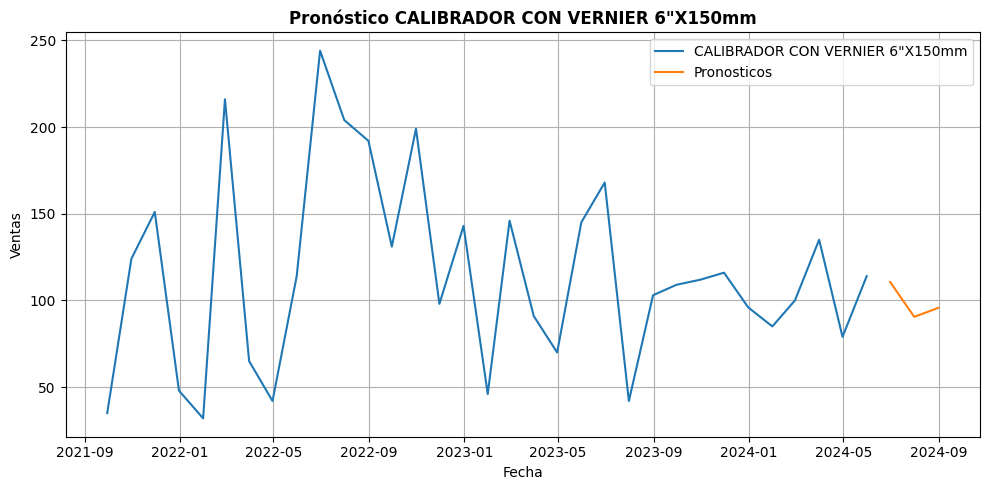

In [ ]:
forecast_all = []

model = ARIMA(order=(2,2,1))
model.fit(df_grouped)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index,df_grouped[nombres_productos[0]],label=nombres_productos[0])
plt.plot(forecast.index,forecast,label="Pronosticos")
plt.title('Pronóstico ' + nombres_productos[0], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


## PRONOSTICOS PARA PRODUCTO 2

In [ ]:
train_len = df_grouped2.shape[0]-Periodos_pronostico
train_td = df_grouped2[:train_len]
test_td = df_grouped2[train_len:]


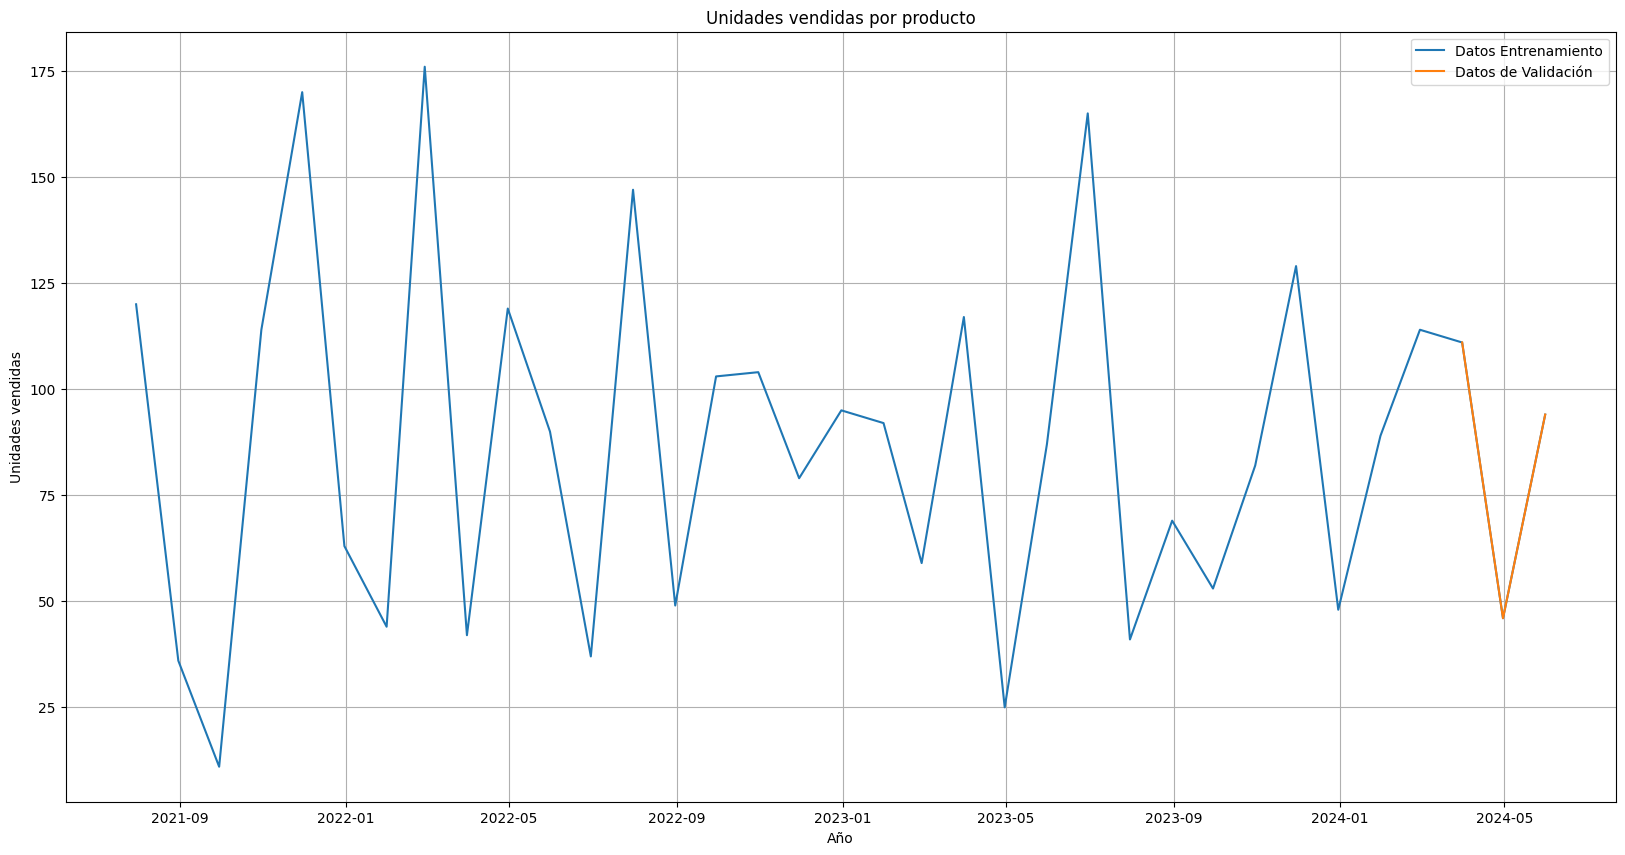

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(df_grouped2[nombres_productos[1]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[1]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [ ]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[1]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [ ]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 25.98 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[1]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 2         | -46.23    | 0.1925    | 0.3486    | 0.3968    | 0.538     | 0.8384    | 1.37      |
| 6         | -43.7     | 0.1827    | 0.3162    | 0.4855    | 0.6297    | 0.7922    | 1.374     |
| 8         | -28.84    | 0.2084    | 0.01      | 0.5883    | 0.3537    | 0.8638    | 1.662     |
| 10        | -19.69    | 0.01      | 0.5689    | 0.5432    | 0.4387    | 0.0       | 1.54      |
| 72        | -14.84    | 0.9267    | 0.9885    | 0.9342    | 0.6395    | 0.4546    | 0.9722    |


In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.93, beta = 0.99, gamma = 0.64, error = mul, trend = mul, seasonal = add, RMSE = 14.84


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [ ]:
runstest_1samp(train_td[nombres_productos[1]], correction=False)

(1.4659702700102557, 0.14265638641077913)

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[1]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    4.348008   0.037052   3.964360   0.046473        rechazo_ho/hay_autocorr   
2    7.206018   0.027242   6.486133   0.039044        rechazo_ho/hay_autocorr   
3    9.435039   0.024033   8.387358   0.038649        rechazo_ho/hay_autocorr   
4   10.672194   0.030506   9.406191   0.051711        rechazo_ho/hay_autocorr   
5   13.141336   0.022090  11.366981   0.044570        rechazo_ho/hay_autocorr   
6   14.248577   0.026979  12.213694   0.057368        rechazo_ho/hay_autocorr   
7   15.218084   0.033303  12.926567   0.073918        rechazo_ho/hay_autocorr   
8   18.466840   0.017986  15.219806   0.055010        rechazo_ho/hay_autocorr   
9   19.030437   0.024935  15.601063   0.075694        rechazo_ho/hay_autocorr   
10  19.163063   0.038240  15.686880   0.108954        rechazo_ho/hay_autocorr   
11  20.369915   0.040518  16.432289   0.125826        rechazo_ho/hay_autocorr   
12  22.594165   0.031376  17.740671   0.123795        rechazo_ho/hay_autocorr   
13  23.544916   0.035583  18.271973   0.147463        rechazo_ho/hay_autocorr   
14  23.778848   0.048719  18.395819   0.189343        rechazo_ho/hay_autocorr   
15  24.445995   0.057897  18.729393   0.226259  no_rechazo_ho/no_hay_autocorr   
16  29.147224   0.022962  20.941736   0.180761        rechazo_ho/hay_autocorr   
17  33.396430   0.010036  22.816386   0.155324        rechazo_ho/hay_autocorr   
18  33.437728   0.014766  22.833391   0.197074        rechazo_ho/hay_autocorr   
19  36.210248   0.009945  23.893472   0.200270        rechazo_ho/hay_autocorr   
20  36.220365   0.014489  23.897042   0.246919        rechazo_ho/hay_autocorr   

                            bp_ho  
1         rechazo_ho/hay_autocorr  
2         rechazo_ho/hay_autocorr  
3         rechazo_ho/hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5         rechazo_ho/hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [ ]:
stats.shapiro(train_td[nombres_productos[1]])

ShapiroResult(statistic=0.9657007455825806, pvalue=0.38991579413414)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[1]])

SignificanceResult(statistic=1.1887337060478314, pvalue=0.5519118966157139)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[1]]-train_td[nombres_productos[1]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.046301   0.829629  0.042216   0.837208
2    0.452188   0.797643  0.400351   0.818587
3    1.423734   0.699981  1.229023   0.746052
4    1.625201   0.804256  1.394937   0.845075
5    4.133748   0.530325  3.387019   0.640548
6    4.561518   0.601148  3.714136   0.715296
7    5.694432   0.575847  4.547161   0.715031
8    5.801487   0.669457  4.622730   0.797033
9    5.881620   0.751705  4.676937   0.861513
10   5.905721   0.823121  4.692532   0.910749
11   5.915624   0.878934  4.698648   0.944878
12   5.986471   0.916763  4.740323   0.966095
13   6.797635   0.912277  5.193621   0.970680
14   6.799257   0.942173  5.194479   0.982918
15   7.599577   0.938832  5.594639   0.985783
16   8.877567   0.918370  6.196047   0.985836
17   9.774181   0.912812  6.591612   0.988246
18  13.388994   0.767965  8.080064   0.977421
19  15.846241   0.667511  9.019599   0.973152
20  16.778670   0.667295  9.348692   0.978505

#### **6.3 Normalidad**

In [ ]:
stats.shapiro(train_td[nombres_productos[1]])

ShapiroResult(statistic=0.9657007455825806, pvalue=0.38991579413414)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[1]])

SignificanceResult(statistic=1.1887337060478314, pvalue=0.5519118966157139)

#### **6.4 Modelo**

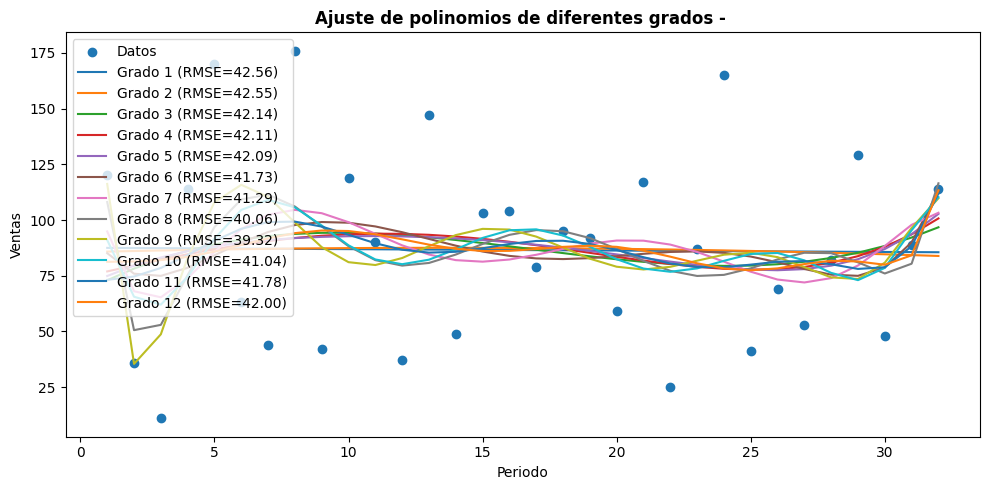

In [ ]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={mean_squared_error(y, y_pred, squared=False):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_9(fore, w, data, objetivo):


    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7
        train.loc[:,"x8"] = x**8
        train.loc[:,"x9"] = x**9

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8","x9"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8,x_for**9),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return mean_squared_error(test, forecast_all, squared=False)

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_9(j, i, train_td, nombres_productos[1])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 417.72


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [ ]:
datos_diff_1_12 = train_td[nombres_productos[1]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -0.9891761513063, p-value: 0.7571915514817574
KPSS Statistic: 0.30168585184460334, p-value: 0.1


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[1]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


| 5         | -15.9     | 0.6134    | 2.634     | 0.08216   |
| 10        | -14.39    | 0.0       | 2.403     | 1.745     |
| 11        | -12.91    | 0.007069  | 1.626     | 2.753     |
| 19        | -10.87    | 0.0       | 2.156     | 0.0       |
| 24        | -8.556    | 2.063     | 1.953     | 3.0       |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 2, D = 2, Q = 3, RMSE = 8.56


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 25.98 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 14.84 (w = 24, f = 3, alfa = 0.93, beta = 0.99, gamma = 0.64, error = mul, trend = mul, seasonal = add)

* Modelo polinomio orden 9: RMSE = 417.72 (w = 24, f = 3)

* ARIMA(2,2,3): RMSE = 8.56 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(2,2,3) que tiene un RMSE de 8.56**

2024-06-30    124.056294
2024-07-31     65.865753
2024-08-31    126.450409
Freq: M, dtype: float64


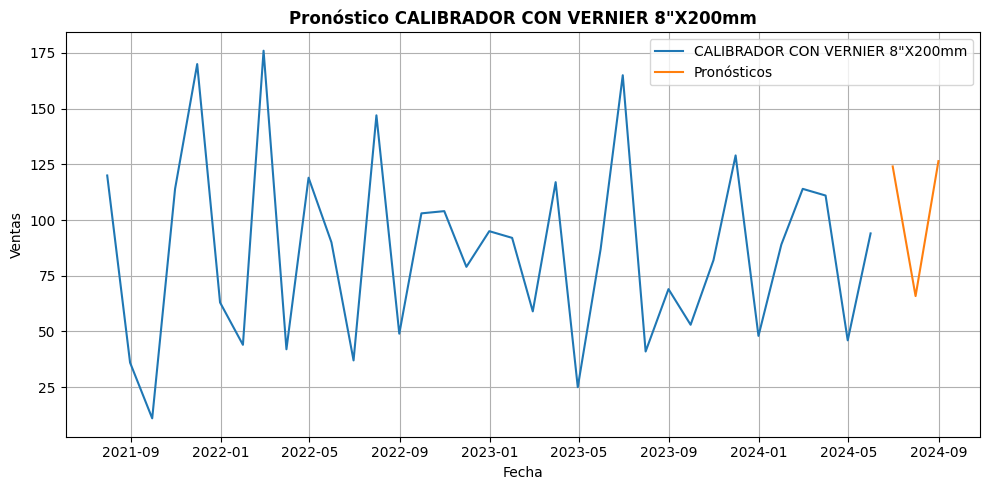

In [ ]:
forecast_all = []

model = ARIMA(order=(2,2,3))
model.fit(df_grouped2)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped2.index,df_grouped2[nombres_productos[1]],label=nombres_productos[1])
plt.plot(forecast.index,forecast,label="Pronósticos")
plt.title('Pronóstico ' + nombres_productos[1], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


## PRONOSTICOS PARA PRODUCTO 3

In [ ]:
train_len = df_grouped3.shape[0]-Periodos_pronostico
train_td = df_grouped3[:train_len]
test_td = df_grouped3[train_len:]


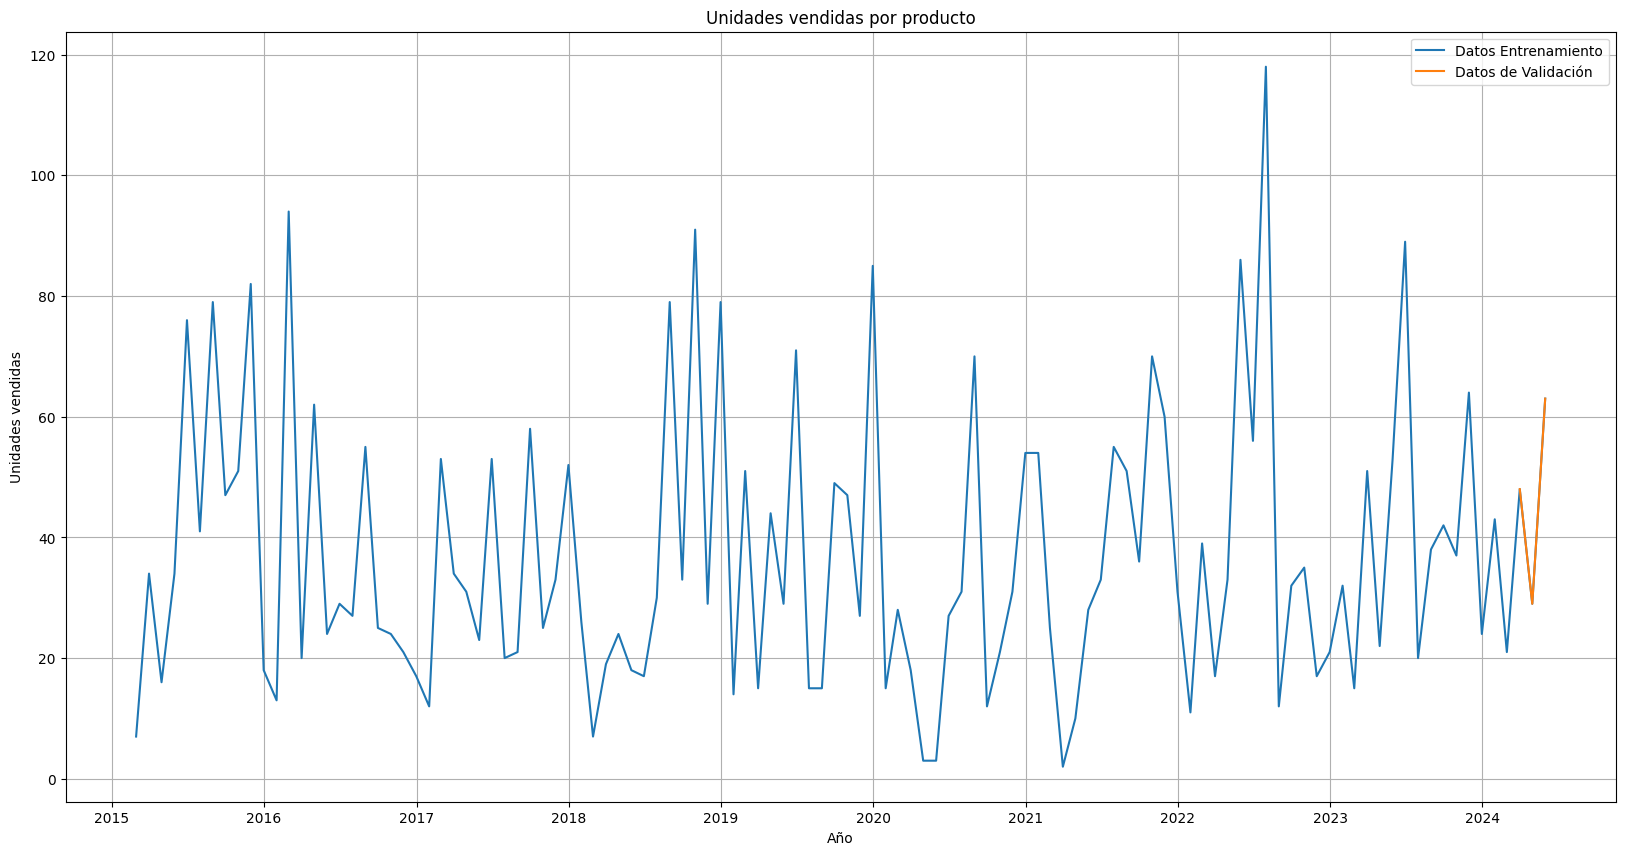

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(df_grouped3[nombres_productos[2]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[2]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [ ]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2,Ventana_3]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[2]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [ ]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 15.36 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1, Ventana_3]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 4         | -14.25    | 0.1476    | 0.2041    | 0.8007    | 0.9589    | 0.6268    | 1.385     |
| 10        | -9.258    | 0.01      | 0.723     | 0.3955    | 0.7371    | 0.4034    | 1.864     |
| 12        | -6.635    | 0.04375   | 0.7463    | 0.3633    | 0.7578    | 0.5211    | 1.876     |

Modelo Holt-Winters para el Producto, Tamaño de ventana = 48, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 5         | -26.68    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 10        | -8.034    | 0.01      | 0.7241

In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.04, beta = 0.75, gamma = 0.76, error = add, trend = None, seasonal = mul, RMSE = 6.63
w = 48, fore = 3, alfa = 0.01, beta = 0.53, gamma = 0.99, error = add, trend = None, seasonal = mul, RMSE = 6.14


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [ ]:
runstest_1samp(train_td[nombres_productos[2]], correction=False)

(0.17316646268588046, 0.8625205842577847)

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[2]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.101719   0.749777   0.098970   0.753070  no_rechazo_ho/no_hay_autocorr   
2    3.908253   0.141688   3.768331   0.151956  no_rechazo_ho/no_hay_autocorr   
3    3.990623   0.262478   3.846991   0.278467  no_rechazo_ho/no_hay_autocorr   
4    5.708551   0.221997   5.472058   0.242197  no_rechazo_ho/no_hay_autocorr   
5    7.502053   0.185898   7.152456   0.209547  no_rechazo_ho/no_hay_autocorr   
6    7.528269   0.274739   7.176783   0.304808  no_rechazo_ho/no_hay_autocorr   
7   12.027783   0.099649  11.311471   0.125598  no_rechazo_ho/no_hay_autocorr   
8   13.510059   0.095464  12.660209   0.124088  no_rechazo_ho/no_hay_autocorr   
9   14.786746   0.096963  13.810377   0.129232  no_rechazo_ho/no_hay_autocorr   
10  16.953137   0.075407  15.742564   0.107243  no_rechazo_ho/no_hay_autocorr   
11  17.790968   0.086559  16.482271   0.124150  no_rechazo_ho/no_hay_autocorr   
12  17.882593   0.119302  16.562340   0.166815  no_rechazo_ho/no_hay_autocorr   
13  17.899415   0.161376  16.576888   0.219375  no_rechazo_ho/no_hay_autocorr   
14  17.904909   0.211146  16.581591   0.279161  no_rechazo_ho/no_hay_autocorr   
15  21.554545   0.120027  19.672273   0.184868  no_rechazo_ho/no_hay_autocorr   
16  21.556361   0.158102  19.673794   0.235273  no_rechazo_ho/no_hay_autocorr   
17  25.007211   0.094548  22.533958   0.165046  no_rechazo_ho/no_hay_autocorr   
18  25.007300   0.124715  22.534031   0.209136  no_rechazo_ho/no_hay_autocorr   
19  25.279975   0.151531  22.755119   0.248300  no_rechazo_ho/no_hay_autocorr   
20  25.439676   0.185125  22.883168   0.294568  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [ ]:
stats.shapiro(train_td[nombres_productos[2]])

ShapiroResult(statistic=0.9175184965133667, pvalue=4.5706833589065354e-06)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[2]])

SignificanceResult(statistic=20.538552825747782, pvalue=3.46824621308107e-05)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[2]]-train_td[nombres_productos[2]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.798150   0.371647  0.776578   0.378190
2    3.511695   0.172761  3.392338   0.183385
3    4.011239   0.260253  3.869380   0.275919
4    4.081910   0.395034  3.936231   0.414705
5    4.631165   0.462528  4.450848   0.486487
6    4.639284   0.590837  4.458382   0.614897
7    5.378336   0.613896  5.137511   0.643186
8    5.378374   0.716475  5.137546   0.742779
9    5.476364   0.790964  5.225825   0.814195
10   5.667960   0.842346  5.396708   0.863153
11   6.518041   0.836664  6.147230   0.863362
12   6.655369   0.879523  6.267237   0.902016
13   7.101048   0.896869  6.652689   0.919152
14   7.195151   0.926927  6.733228   0.944507
15   7.473121   0.943168  6.968626   0.958514
16   8.033899   0.947851  7.438467   0.963856
17   8.897890   0.943411  8.154567   0.963129
18   9.898853   0.935158  8.975176   0.960315
19  10.231078   0.947013  9.244548   0.969193
20  10.555402   0.956948  9.504592   0.976292

#### **6.3 Normalidad**

In [ ]:
stats.shapiro(train_td[nombres_productos[2]])

ShapiroResult(statistic=0.9175184965133667, pvalue=4.5706833589065354e-06)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[2]])

SignificanceResult(statistic=20.538552825747782, pvalue=3.46824621308107e-05)

#### **6.4 Modelo**

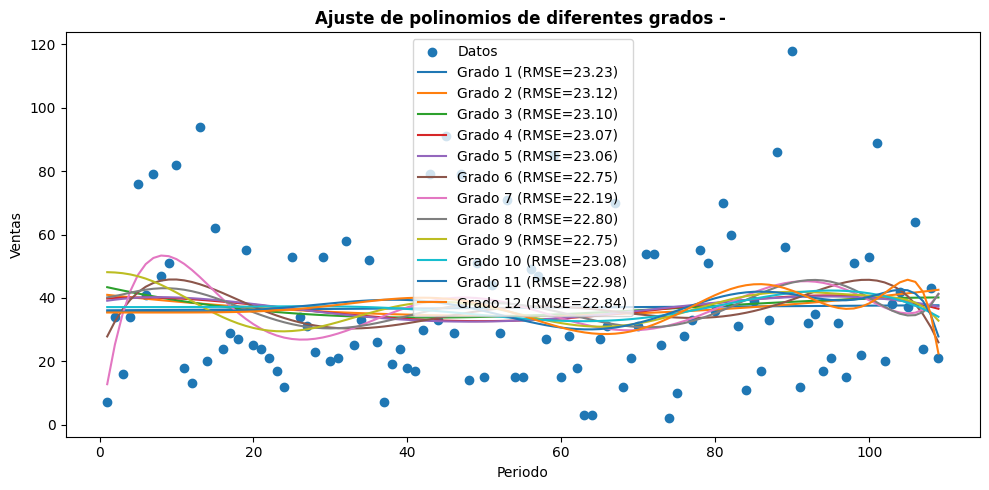

In [ ]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={mean_squared_error(y, y_pred, squared=False):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_7(fore, w, data, objetivo):


    data = data
    y_obj = objetivo

    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train.loc[:,"x"] = x
        train.loc[:,"x2"] = x**2
        train.loc[:,"x3"] = x**3
        train.loc[:,"x4"] = x**4
        train.loc[:,"x5"] = x**5
        train.loc[:,"x6"] = x**6
        train.loc[:,"x7"] = x**7

        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')

        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)

        forecast_all.append(preds['Point_forecast'])

    test = data[-fore:]
    return mean_squared_error(test, forecast_all, squared=False)

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2,Ventana_3]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 7 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_7(j, i, train_td, nombres_productos[2])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 7 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 96.95
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 69.64
Tamaño de ventana = 48, periodos evaluados = 3, RMSE = 22.67


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [ ]:
datos_diff_1_12 = train_td[nombres_productos[2]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.6349734804323024, p-value: 0.005126553719105244
KPSS Statistic: 0.24597428841512003, p-value: 0.1


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


| 3         | -16.52    | 0.5588    | 1.037     | 1.19      |
| 4         | -16.43    | 1.616     | 1.258     | 2.056     |
| 6         | -15.77    | 1.369     | 1.206     | 1.854     |
| 12        | -14.93    | 1.384     | 3.0       | 1.648     |
| 17        | -13.76    | 0.0       | 0.3823    | 1.796     |
| 20        | -13.09    | 0.0       | 0.6577    | 2.301     |
| 31        | -10.81    | 0.0       | 3.0       | 0.7247    |
| 52        | -10.29    | 1.448     | 2.018     | 2.037     |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 2, D = 1, Q = 2, RMSE = 10.29


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 4         | -16.34    | 1.616     | 1.258     | 2.056     |
| 7         | -15.8     | 2.096     | 1.43      | 2.504     |
| 8         | -15.71    | 1.896     | 0.4921    | 2.771     |
| 14        | -13.15    | 0.0       | 0.0       | 2.267     |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 0, D = 0, Q = 2, RMSE = 13.15


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_3]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[2]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 48, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 4         | -17.21    | 1.616     | 1.258     | 2.056     |
| 11        | -16.54    | 2.627     | 0.8285    | 1.672     |
| 19        | -12.22    | 0.488     | 0.3578    | 2.352     |
| 20        | -6.603    | 0.0       | 0.0       | 2.737     |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 48, fore = 3, P = 0, D = 0, Q = 3, RMSE = 6.6


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 15.36 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 6.14 (w = 48, f = 3, alfa = 0.01, beta = 0.53, gamma = 0.99, error = add, trend = None, seasonal = mul)

* Modelo polinomio orden 7: RMSE = 22.67 (w = 48, f = 3)

* ARIMA(0,0,3): RMSE = 6.6 (w = 24, f = 3)

**En este caso el mejor modelo de todos es Holt-Winters que tiene un RMSE de 6.14**

2024-06-30    50.116449
2024-07-31    39.666330
2024-08-31    46.669091
Freq: M, Name: simulation, dtype: float64


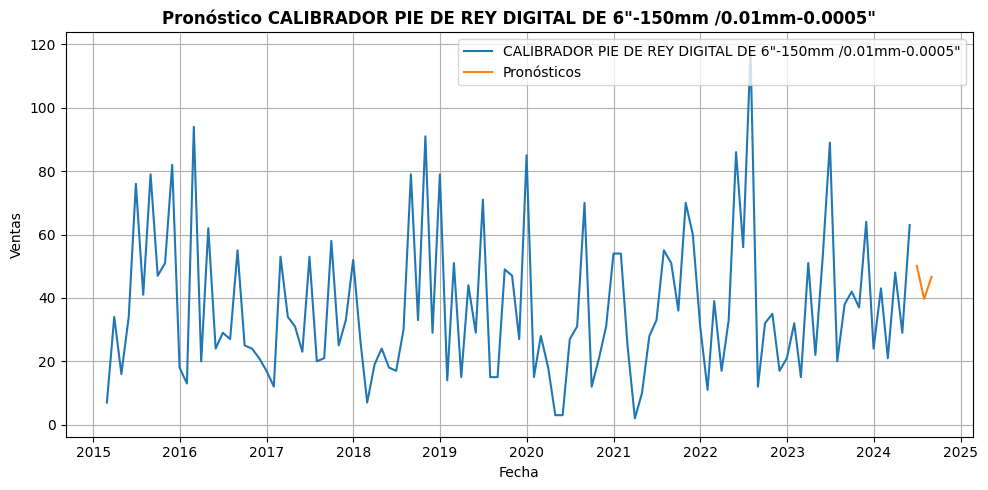

In [ ]:
forecast_all = []

model = ETSModel(endog = df_grouped3[nombres_productos[2]], error = 'add' , trend = None , seasonal = 'mul')
ets_result = model.fit()

forecast = ets_result.forecast(steps=Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped3.index,df_grouped3[nombres_productos[2]],label=nombres_productos[2])
plt.plot(forecast.index,forecast,label="Pronósticos")
plt.title('Pronóstico ' + nombres_productos[2], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


## PRONOSTICOS PARA PRODUCTO 4

In [ ]:
train_len = df_grouped4.shape[0]-Periodos_pronostico + 1
train_td = df_grouped4[:train_len]
test_td = df_grouped4[train_len:]


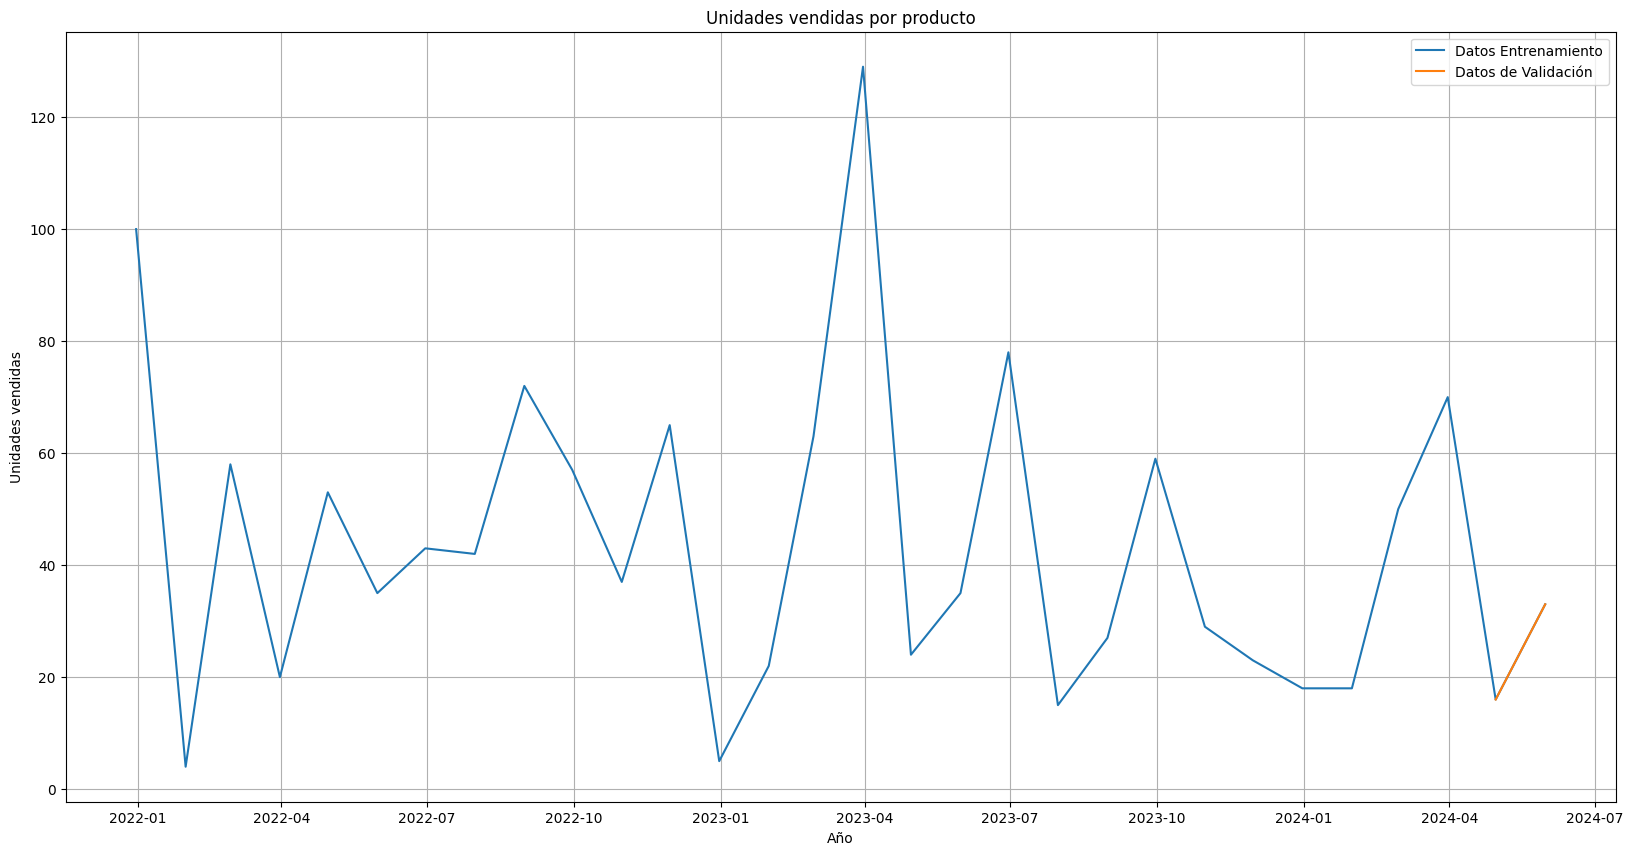

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(df_grouped4[nombres_productos[3]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[3]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [ ]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[3]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [ ]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 27.85 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 2


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[3]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 5         | -20.57    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 12        | -16.98    | 0.5095    | 0.6929    | 0.1649    | 0.6154    | 0.4026    | 1.66      |
| 30        | -7.514    | 0.1598    | 0.01      | 0.3012    | 0.3997    | 0.0       | 0.0       |
| 87        | -7.389    | 0.1787    | 0.338     | 0.169     | 0.4043    | 0.2626    | 1.612     |


In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.18, beta = 0.34, gamma = 0.4, error = add, trend = None, seasonal = add, RMSE = 7.39


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [ ]:
runstest_1samp(train_td[nombres_productos[3]], correction=False)

(0.899438026795034, 0.3684193918819576)

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[3]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue   bp_stat  bp_pvalue                          lb_ho  \
1    0.688802   0.406572  0.619922   0.431076  no_rechazo_ho/no_hay_autocorr   
2    1.345533   0.510295  1.189088   0.551814  no_rechazo_ho/no_hay_autocorr   
3    1.353904   0.716375  1.196064   0.753948  no_rechazo_ho/no_hay_autocorr   
4    1.355023   0.851973  1.196959   0.878599  no_rechazo_ho/no_hay_autocorr   
5    2.973877   0.704013  2.438081   0.785790  no_rechazo_ho/no_hay_autocorr   
6    3.405816   0.756455  2.754837   0.838928  no_rechazo_ho/no_hay_autocorr   
7    3.779722   0.804771  3.016571   0.883465  no_rechazo_ho/no_hay_autocorr   
8    4.535317   0.805889  3.520300   0.897608  no_rechazo_ho/no_hay_autocorr   
9    4.542764   0.872209  3.525017   0.939811  no_rechazo_ho/no_hay_autocorr   
10   5.287280   0.871180  3.971727   0.948613  no_rechazo_ho/no_hay_autocorr   
11   5.788151   0.887119  4.255553   0.961836  no_rechazo_ho/no_hay_autocorr   
12   5.789309   0.926328  4.256171   0.978358  no_rechazo_ho/no_hay_autocorr   
13   5.823267   0.952349  4.273150   0.987924  no_rechazo_ho/no_hay_autocorr   
14   7.471336   0.915014  5.042249   0.985216  no_rechazo_ho/no_hay_autocorr   
15   8.540750   0.900281  5.505662   0.986910  no_rechazo_ho/no_hay_autocorr   
16   8.558720   0.930469  5.512850   0.992556  no_rechazo_ho/no_hay_autocorr   
17   9.382890   0.927479  5.815046   0.994345  no_rechazo_ho/no_hay_autocorr   
18  11.004391   0.894170  6.355546   0.994529  no_rechazo_ho/no_hay_autocorr   
19  11.042862   0.922388  6.367087   0.996899  no_rechazo_ho/no_hay_autocorr   
20  11.382494   0.935694  6.457656   0.998121  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [ ]:
stats.shapiro(train_td[nombres_productos[3]])

ShapiroResult(statistic=0.9323631525039673, pvalue=0.0707319900393486)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[3]])

SignificanceResult(statistic=5.399103666903038, pvalue=0.06723563875266461)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[3]]-train_td[nombres_productos[3]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.001726   0.966866  0.001553   0.968565
2    0.371210   0.830602  0.321773   0.851389
3    1.361846   0.714502  1.147303   0.765669
4    1.372229   0.849007  1.155609   0.885352
5    2.201552   0.820612  1.791424   0.877187
6    3.046066   0.803043  2.410734   0.878321
7    3.222142   0.863720  2.533987   0.924516
8    3.984777   0.858494  3.042410   0.931668
9    4.638491   0.864615  3.456429   0.943427
10   5.168628   0.879632  3.774512   0.956946
11   6.307668   0.852067  4.419967   0.955986
12   6.339952   0.897985  4.437185   0.974195
13   6.570231   0.922922  4.552325   0.983774
14   7.125585   0.929762  4.811490   0.988267
15  12.945147   0.606535  7.333300   0.947732
16  12.952074   0.676259  7.336071   0.966227
17  12.958840   0.738937  7.338552   0.978726
18  13.093454   0.785991  7.383423   0.986475
19  13.144869   0.831073  7.398848   0.991764
20  13.149023   0.870899  7.399956   0.995152

#### **6.3 Normalidad**

In [ ]:
stats.shapiro(train_td[nombres_productos[3]])

ShapiroResult(statistic=0.9323631525039673, pvalue=0.0707319900393486)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[3]])

SignificanceResult(statistic=5.399103666903038, pvalue=0.06723563875266461)

#### **6.4 Modelo**

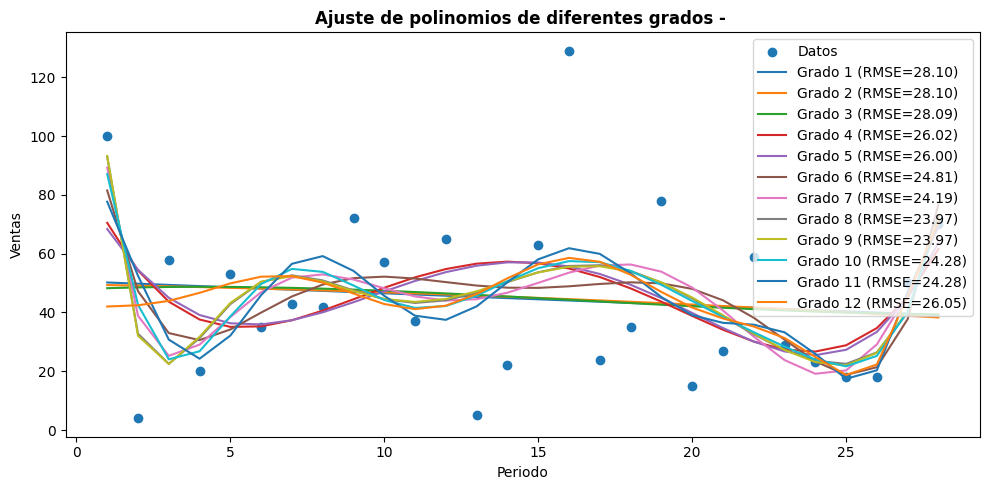

In [ ]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={mean_squared_error(y, y_pred, squared=False):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_9(j, i, train_td, nombres_productos[3])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 430.6


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [ ]:
datos_diff_1_12 = train_td[nombres_productos[3]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -4.117678852677751, p-value: 0.0009053696037882015
KPSS Statistic: 0.4263592433214793, p-value: 0.06579342960281065


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[3]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


| 2         | -22.27    | 0.907     | 0.4403    | 0.277     |
| 9         | -21.58    | 0.1489    | 0.0       | 0.0       |
| 11        | -21.57    | 3.0       | 1.484     | 1.393     |
| 20        | -19.31    | 1.795     | 0.3381    | 0.3503    |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 2, Q = 0, RMSE = 19.31


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto 1, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 27.85 (w = 24, f = 3, rezagos = 5)

* Suavizacion Holt-Winters: RMSE = 7.39 (w = 24, f = 3, alfa = 0.18, beta = 0.34, gamma = 0.4, error = add, trend = None, seasonal = add)

* Modelo polinomio orden 9: RMSE = 430.6 (w = 24, f = 3)

* ARIMA(0,2,0): RMSE = 19.31 (w = 24, f = 3)

**En este caso el mejor modelo de todos es el Holt-Winters que tiene un RMSE de 7.39**

2024-06-30    60.505008
2024-07-31    28.496755
2024-08-31    49.491823
Freq: M, Name: simulation, dtype: float64


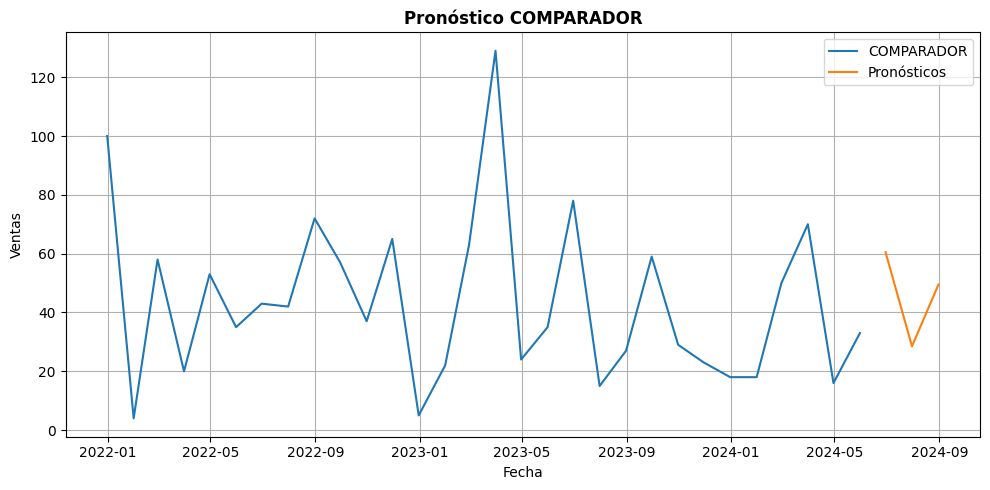

In [ ]:
forecast_all = []

model = ETSModel(endog = df_grouped4[nombres_productos[3]], error = 'add' , trend = None , seasonal = 'add')
ets_result = model.fit()

forecast = ets_result.forecast(steps=Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped4.index,df_grouped4[nombres_productos[3]],label=nombres_productos[3])
plt.plot(forecast.index,forecast,label="Pronósticos")
plt.title('Pronóstico ' + nombres_productos[3], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


## PRONOSTICOS PARA PRODUCTO 5

In [ ]:
train_len = df_grouped5.shape[0]-Periodos_pronostico
train_td = df_grouped5[:train_len]
test_td = df_grouped5[train_len:]


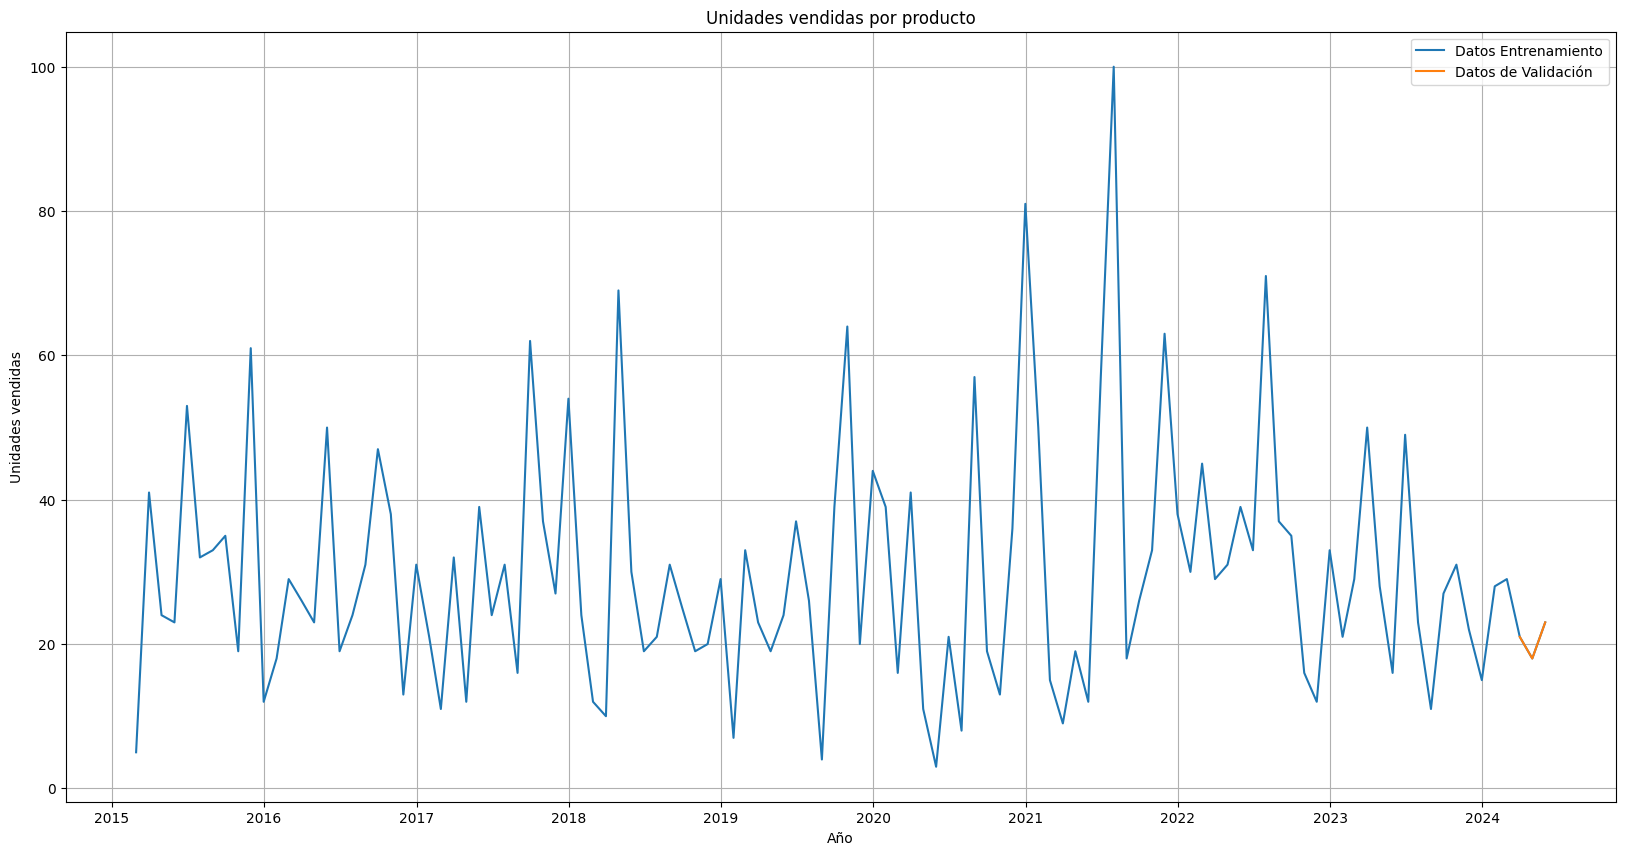

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(df_grouped5[nombres_productos[4]],label="Datos Entrenamiento")
plt.plot(test_td[nombres_productos[4]],label= "Datos de Validación")
plt.legend()
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [ ]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2,Ventana_3]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[4]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [ ]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto con un RMSE mínimo de 5.86 es:
Tamaño de ventana = 24       
Periodos a pronosticar = 3
Numero de rezagos = 4


#### **5.2 Suavizacion Exponencial con optimización Bayesiana**

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2,Ventana_3]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------
| 4         | -22.35    | 0.1476    | 0.2041    | 0.8007    | 0.9589    | 0.6268    | 1.385     |
| 5         | -20.12    | 0.8689    | 0.8867    | 0.08504   | 0.04827   | 0.3397    | 1.756     |
| 10        | -10.91    | 0.01      | 0.01      | 0.0       | 0.99      | 0.2478    | 0.7511    |
| 11        | -9.484    | 0.01      | 0.01      | 0.4577    | 0.6535    | 1.2       | 0.1841    |
| 15        | -7.737    | 0.2681    | 0.01      | 0.0       | 0.99      | 2.0       | 0.8693    |
| 27        | -7.643    | 0.01      | 0.01      | 0.8375    | 0.01      | 2.0       | 1.094     |

Modelo Holt-Winters para el Producto, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta

In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto:

w = 24, fore = 3, alfa = 0.01, beta = 0.01, gamma = 0.01, error = mul, trend = mul, seasonal = None, RMSE = 7.64
w = 36, fore = 3, alfa = 0.01, beta = 0.01, gamma = 0.01, error = add, trend = add, seasonal = None, RMSE = 6.62
w = 48, fore = 3, alfa = 0.39, beta = 0.02, gamma = 0.22, error = mul, trend = mul, seasonal = None, RMSE = 7.77


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación)

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [ ]:
runstest_1samp(train_td[nombres_productos[4]], correction=False)

(0.5575153018064896, 0.5771754073021178)

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[4]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

lb_stat  lb_pvalue    bp_stat  bp_pvalue                          lb_ho  \
1    0.047389   0.827670   0.046108   0.829979  no_rechazo_ho/no_hay_autocorr   
2    3.225478   0.199341   3.109672   0.211224  no_rechazo_ho/no_hay_autocorr   
3    3.230850   0.357384   3.114801   0.374262  no_rechazo_ho/no_hay_autocorr   
4    3.232677   0.519669   3.116530   0.538517  no_rechazo_ho/no_hay_autocorr   
5    3.233280   0.664071   3.117094   0.681939  no_rechazo_ho/no_hay_autocorr   
6    3.237177   0.778544   3.120711   0.793551  no_rechazo_ho/no_hay_autocorr   
7    4.302593   0.744339   4.099742   0.768220  no_rechazo_ho/no_hay_autocorr   
8    4.347572   0.824482   4.140669   0.844214  no_rechazo_ho/no_hay_autocorr   
9    7.995056   0.534645   7.426690   0.592786  no_rechazo_ho/no_hay_autocorr   
10   9.897527   0.449529   9.123489   0.520426  no_rechazo_ho/no_hay_autocorr   
11  13.181504   0.281628  12.022856   0.361928  no_rechazo_ho/no_hay_autocorr   
12  13.264901   0.350084  12.095734   0.438022  no_rechazo_ho/no_hay_autocorr   
13  13.422886   0.415703  12.232370   0.508688  no_rechazo_ho/no_hay_autocorr   
14  13.454536   0.491086  12.259458   0.585475  no_rechazo_ho/no_hay_autocorr   
15  13.845917   0.537246  12.590898   0.633864  no_rechazo_ho/no_hay_autocorr   
16  15.963078   0.455541  14.364735   0.571562  no_rechazo_ho/no_hay_autocorr   
17  19.137609   0.320691  16.995878   0.454645  no_rechazo_ho/no_hay_autocorr   
18  20.835711   0.287783  18.388016   0.430380  no_rechazo_ho/no_hay_autocorr   
19  20.964102   0.338788  18.492116   0.489823  no_rechazo_ho/no_hay_autocorr   
20  21.218623   0.384367  18.696192   0.541645  no_rechazo_ho/no_hay_autocorr   

                            bp_ho  
1   no_rechazo_ho/no_hay_autocorr  
2   no_rechazo_ho/no_hay_autocorr  
3   no_rechazo_ho/no_hay_autocorr  
4   no_rechazo_ho/no_hay_autocorr  
5   no_rechazo_ho/no_hay_autocorr  
6   no_rechazo_ho/no_hay_autocorr  
7   no_rechazo_ho/no_hay_autocorr  
8   no_rechazo_ho/no_hay_autocorr  
9   no_rechazo_ho/no_hay_autocorr  
10  no_rechazo_ho/no_hay_autocorr  
11  no_rechazo_ho/no_hay_autocorr  
12  no_rechazo_ho/no_hay_autocorr  
13  no_rechazo_ho/no_hay_autocorr  
14  no_rechazo_ho/no_hay_autocorr  
15  no_rechazo_ho/no_hay_autocorr  
16  no_rechazo_ho/no_hay_autocorr  
17  no_rechazo_ho/no_hay_autocorr  
18  no_rechazo_ho/no_hay_autocorr  
19  no_rechazo_ho/no_hay_autocorr  
20  no_rechazo_ho/no_hay_autocorr

In [ ]:
stats.shapiro(train_td[nombres_productos[4]])

ShapiroResult(statistic=0.9197969436645508, pvalue=6.0964248405070975e-06)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[4]])

SignificanceResult(statistic=49.219763363108235, pvalue=2.0514653473399645e-11)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[4]]-train_td[nombres_productos[4]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.015969   0.899439   0.015538   0.900800
2    0.156963   0.924519   0.151451   0.927071
3    0.565011   0.904393   0.541118   0.909769
4    2.667873   0.614848   2.530311   0.639216
5    2.678468   0.749410   2.540238   0.770423
6    2.711771   0.844055   2.571142   0.860422
7   15.622597   0.028797  14.435143   0.043962
8   15.813027   0.045136  14.608418   0.067222
9   16.079313   0.065244  14.848316   0.095188
10  16.437493   0.087775  15.167773   0.126064
11  16.881951   0.111416  15.560177   0.158260
12  20.670083   0.055425  18.870527   0.091701
13  21.368557   0.065952  19.474612   0.109107
14  21.626226   0.086628  19.695140   0.140050
15  21.927927   0.109708  19.950635   0.173835
16  22.082219   0.140557  20.079906   0.216643
17  23.064747   0.147155  20.894254   0.231056
18  23.483512   0.172687  21.237565   0.267597
19  23.586051   0.212513  21.320706   0.319354
20  23.930352   0.245448  21.596766   0.362786

#### **6.3 Normalidad**

In [ ]:
stats.shapiro(train_td[nombres_productos[4]])

ShapiroResult(statistic=0.9197969436645508, pvalue=6.0964248405070975e-06)

In [ ]:
stats.jarque_bera(train_td[nombres_productos[4]])

SignificanceResult(statistic=49.219763363108235, pvalue=2.0514653473399645e-11)

#### **6.4 Modelo**

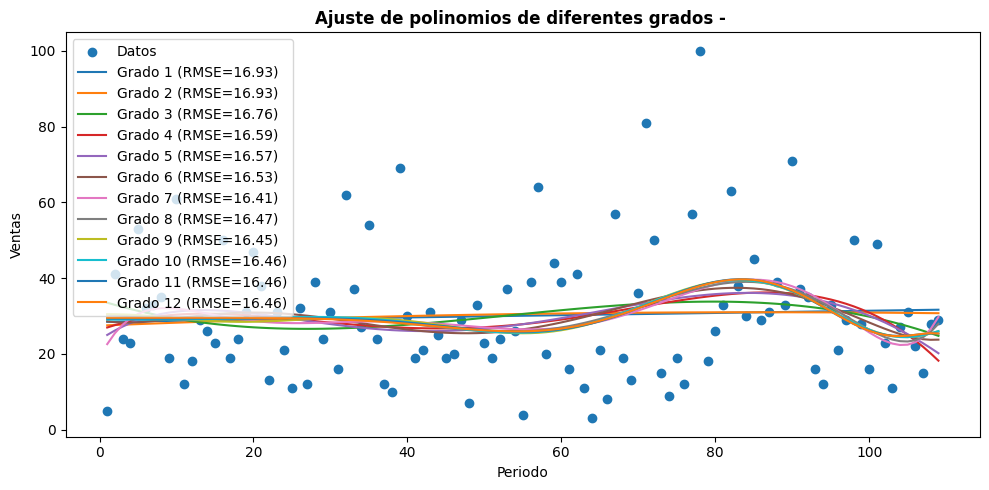

In [ ]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (RMSE={mean_squared_error(y, y_pred, squared=False):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [Ventana_1,Ventana_2,Ventana_3]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_9(j, i, train_td, nombres_productos[4])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")


Modelo con tendencia y estacionalidad con polinomio de orden 9 para el Producto:

Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 416.32
Tamaño de ventana = 36, periodos evaluados = 3, RMSE = 79.34
Tamaño de ventana = 48, periodos evaluados = 3, RMSE = 11.97


### **7. Pronosticando con metodos autoregresivos y de media movil ARIMA con optimizacion Bayesiana**

In [ ]:
datos_diff_1_12 = train_td[nombres_productos[4]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -3.5962080155161935, p-value: 0.005833937541693809
KPSS Statistic: 0.1285054609657139, p-value: 0.1


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_1]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


| 3         | -7.763    | 0.5588    | 1.037     | 1.19      |
| 4         | -7.524    | 1.616     | 1.258     | 2.056     |
| 6         | -6.905    | 1.409     | 1.215     | 1.888     |
| 9         | -5.963    | 0.6825    | 0.4668    | 2.842     |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 24, fore = 3, P = 0, D = 1, Q = 3, RMSE = 5.96


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_2]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 36, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 3         | -5.841    | 0.5588    | 1.037     | 1.19      |
| 5         | -4.545    | 0.6134    | 2.634     | 0.08216   |
| 28        | -4.351    | 2.788     | 0.0       | 3.0       |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 36, fore = 3, P = 0, D = 3, Q = 3, RMSE = 4.35


In [ ]:
warnings.filterwarnings("ignore")
fore = [Periodos_pronostico]
w = [Ventana_3]
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[4]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto, Tamaño de ventana = 48, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 5         | -4.912    | 0.6134    | 2.634     | 0.08216   |


In [ ]:
print('Mejores modelos ARIMA para el Producto:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto:

w = 48, fore = 3, P = 3, D = 1, Q = 0, RMSE = 4.91


### **8. Selección y Pronostico con el mejor modelo**

Los mejores modelos para el Producto, teniendo en cuenta el RMSE mas bajo son:

* Promedio movil: RMSE = 5.14 (w = 24, f = 3, rezagos = 4)

* Suavizacion Holt-Winters: RMSE = 5.21 (w = 36, f = 3, alfa = 0.01, beta = 0.06, gamma = 0.26, error = add, trend = mul, seasonal = None)

* Modelo polinomio orden 10: RMSE = 10.73 (w = 38, f = 3)

* ARIMA(0,3,3): RMSE = 2.65 (w = 48, f = 3)

**En este caso el mejor modelo de todos es el ARIMA(0,3,3) que tiene un RMSE de 4.35**

2024-06-30    21.379868
2024-07-31    20.471072
2024-08-31    19.523743
Freq: M, dtype: float64


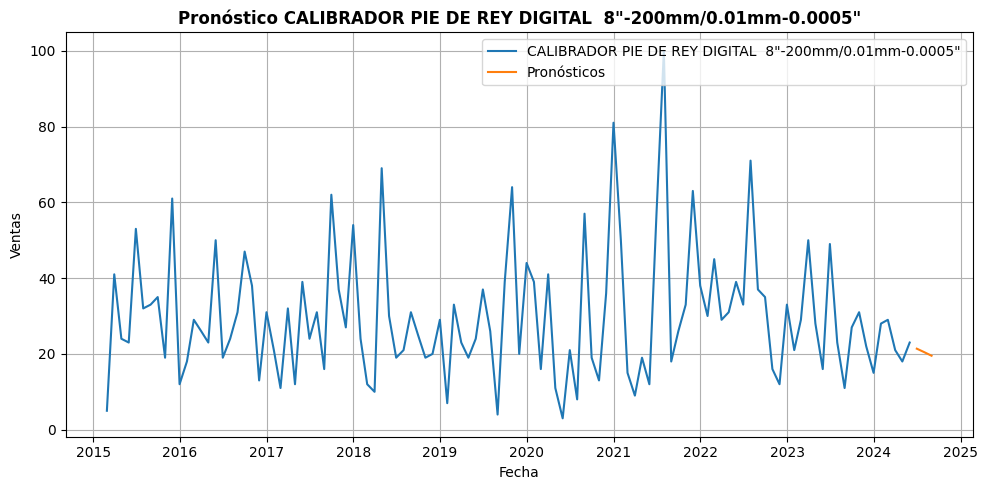

In [ ]:
forecast_all = []

model = ARIMA(order=(0,3,3))
model.fit(df_grouped5)
forecast = model.predict(Periodos_pronostico)

print(forecast)

fig = plt.figure(figsize=(10, 5))
plt.plot(df_grouped5.index,df_grouped5[nombres_productos[4]],label=nombres_productos[4])
plt.plot(forecast.index,forecast,label="Pronósticos")
plt.title('Pronóstico ' + nombres_productos[4], fontweight = 'bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()
